<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Sales Forecasting of Retail Clothing Product Categories

# Project Objective

Sales Forecast has very high influence on the performance of the company's business and hence    
sales forecast can be used to estimate company's success or performance in the coming years.


Sales or revenues forecasting is very important for retail operations . Forecasting of retail sales helps retailer to take necessary measures to plan their budgets or investments in a period (monthly, yearly) among different product categories and at the same time they can plan to minimize revenue loss from unavailability of products by investing accordingly.


Some of the most common problems of retail operators are:

a) Unavailability of right Product's stocks in the right season.

b) Investing On right Product category in the right time.

c) Over availability of Product Stocks of few categories which are seldom bought by the customers.


# Problem Statement

A leading retailer in USA, wants us to forecast sales for their product categories in their store based on the sales history of each category.

Aim:
- Build a Framework that provides monthly sales forecasts of the next 12 months ( Jan - Dec 2016 ) for each product category. 
- Build a Framework that provides monthly sales forecasts of the next 12 months ( Jan - Dec 2016 ) for "WomenClothing" Category.

Here we will study the purchase patters of each product category in each year ( 2009 - 2015 ).
We will also identify the features which will help us to predict the sales.


# Brief about Datasets

### 1. Sales Data

This data contains features like Year, Month, and Product category and Sales (In ThousandDollars), provided for the period 2009 to 2015.

### 2. Weather Data

This Dataset consists the information about the weather conditions like temperature, wind speed, humidity, visibility, precipitation etc from years 2009 - 2016. 

### 3. Event/Holidays Data

This data provides details about the list of holidays and events like (Federal_Holiday/Event) from the years 2009 to 2016.

### 4. Macro Economic Data

This data is provided for the period from 2009 to 2016 with the details like CPI, GDP, Cotton production, mill usage, unemployment rate etc.

Further, We will be analyzing this data through some simple tests as well as through the application of Supervise Machine Learning and Time Series forecast Algorithms.

# Import Packages

In [270]:
import pandas as pd
import numpy as np
from pandas import *

# Date and Time
from datetime import date
from datetime import datetime
import dateutil

# Plotting
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt


# ML Models
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

# Time Series 
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from matplotlib.pylab import rcParams
from pyramid.arima import auto_arima


import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis and Preprocessing

##  Weather Data

### Load Datasets

In [2]:
weather = pd.ExcelFile('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\WeatherDataNew.xlsx')
weather9 = pd.read_excel(weather, sheetname='2009', na_values=[' ', '-'])
weather10 = pd.read_excel(weather, sheetname='2010', na_values=[' ', '-'])
weather11 = pd.read_excel(weather, sheetname='2011', na_values=[' ', '-'])
weather12 = pd.read_excel(weather, sheetname='2012', na_values=[' ', '-'])
weather13 = pd.read_excel(weather, sheetname='2013', na_values=[' ', '-'])
weather14 = pd.read_excel(weather, sheetname='2014', na_values=[' ', '-'])
weather15 = pd.read_excel(weather, sheetname='2015', na_values=[' ', '-'])

#### Concat all Datasets row wise

In [3]:
df_list = [weather9, weather10, weather11, weather12, weather13, weather14, weather15]

weatherData = pd.concat(df_list)
weatherData.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3.0,-6.0,-9.0,-16.0,-17.0,-19.0,54.0,...,1023.0,1015.0,16.0,16.0,16.0,37.0,18.0,60.0,0,NaN
1,2009,Jan,2,1.0,-2.0,-5.0,-3.0,-7.0,-17.0,78.0,...,1012.0,1007.0,16.0,13.0,2.0,27.0,10.0,48.0,T,Snow
2,2009,Jan,3,3.0,1.0,-2.0,-5.0,-9.0,-13.0,72.0,...,1015.0,1008.0,16.0,16.0,16.0,27.0,16.0,42.0,T,NaN
3,2009,Jan,4,6.0,1.0,-4.0,-10.0,-12.0,-13.0,55.0,...,1017.0,1015.0,16.0,16.0,16.0,32.0,12.0,40.0,0,NaN
4,2009,Jan,5,6.0,5.0,3.0,-1.0,-5.0,-16.0,62.0,...,1014.0,1013.0,16.0,16.0,16.0,23.0,11.0,34.0,T,NaN


In [4]:
weatherData.shape

(2556, 23)

###  EDA and Data Preprocessing

#### Drop Day Column

In [5]:
weatherData_noDay = weatherData.copy().drop('Day', axis = 1)
weatherData_noDay.shape

(2556, 22)

#### Changing Column Names

In [6]:
weatherData_noDay.columns = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)',
                        'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)',
                       'Humidity_high', 'Humidity_avg', 'Humidity_low','Sea Level Press high', 'Sea Level Press avg',
                       'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
                       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

#### Change Month Names To Numbers

In [7]:
vals_to_replace = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
weatherData_noDay['Month'] = weatherData_noDay['Month'].apply(lambda x: vals_to_replace[x])

#### Replace T value With 0.01 in Precip (mm) sum Column

- In liquid Precipitation, anything less than 0.01 inch of rain is reported as a trace of rain

In [8]:
print("Nulls In (Precip (mm) sum) :", weatherData_noDay['Precip (mm) sum'].isnull().sum())
weatherData_noDay['Precip (mm) sum'] =   weatherData_noDay['Precip (mm) sum'].apply(lambda x: 0.01 if x == 'T' else x)  
weatherData_noDay['Precip (mm) sum'].isnull().sum()

Nulls In (Precip (mm) sum) : 1


1

#### Convert Dtypes Of Columns

In [9]:
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

In [10]:
weatherData_noDay.iloc[:, 2:-1] = weatherData_noDay.iloc[:, 2:-1].apply(pd.to_numeric, errors = 'coerce')
weatherData_noDay.dtypes

Year                      int64
Month                    object
Temp high (°C)          float64
Temp avg (°C)           float64
Temp low (°C)           float64
Dew Point high (°C)     float64
Dew Point avg (°C)      float64
Dew Point low (°C)      float64
Humidity_high           float64
Humidity_avg            float64
Humidity_low            float64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

#### Fill Missing Values

In [11]:
weatherData_noDay.isnull().sum()/len(weatherData_noDay)*100

Year                     0.000000
Month                    0.000000
Temp high (°C)           0.078247
Temp avg (°C)            0.078247
Temp low (°C)            0.078247
Dew Point high (°C)      0.078247
Dew Point avg (°C)       0.078247
Dew Point low (°C)       0.078247
Humidity_high            0.078247
Humidity_avg             0.078247
Humidity_low             0.078247
Sea Level Press high     0.547731
Sea Level Press avg      0.547731
Sea Level Press low      0.547731
Visibility (km) high     0.899844
Visibility (km) avg      0.899844
Visibility (km) low      0.899844
Wind (km/h) low          0.586854
Wind (km/h) avg          0.586854
Wind (km/h) high         1.799687
Precip (mm) sum          0.039124
WeatherEvent            65.023474
dtype: float64

In [12]:
weatherData_noDay.iloc[:, 2:-1] = weatherData_noDay.iloc[:, 2:-1].apply(lambda x: x.fillna(x.mean()))
weatherData_noDay.loc[:, 'WeatherEvent'] = weatherData_noDay.loc[:, 'WeatherEvent'].fillna('Other')

### Aggrigating WeatherData to month level

In [13]:
weatherData_avg = weatherData_noDay.groupby(['Year', 'Month']).agg('mean').reset_index()
weatherData_avg.tail()

,Year,Month,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,...,Sea Level Press high,Sea Level Press avg,Sea Level Press low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip (mm) sum
79,2015,5,25.677419,20.483871,14.774194,12.774194,9.870968,6.709677,74.354839,56.709677,...,1022.870968,1020.290323,1017.741935,15.935484,14.032258,10.645161,21.129032,6.806452,34.225806,1.524839
80,2015,6,25.800000,21.866667,17.733333,17.133333,14.300000,10.833333,81.000000,65.033333,...,1017.700000,1014.866667,1012.066667,16.000000,13.100000,8.900000,21.100000,7.533333,33.800000,4.022667
81,2015,7,29.967742,26.129032,22.129032,19.096774,16.548387,13.612903,74.354839,59.096774,...,1014.903226,1012.741935,1010.774194,16.000000,14.161290,9.451613,18.000000,5.483871,30.032258,3.262581
82,2015,8,30.516129,26.322581,21.677419,17.580645,15.290323,12.709677,70.806452,54.870968,...,1017.000000,1015.225806,1013.516129,16.000000,15.354839,13.096774,18.548387,5.903226,30.451613,1.925484
83,2015,9,28.133333,23.700000,18.966667,16.866667,14.400000,11.266667,75.066667,58.633333,...,1021.000000,1018.300000,1015.800000,15.766667,14.766667,11.933333,19.433333,7.033333,30.166667,2.777333


In [14]:
weatherData_avg['Year'] = weatherData_avg['Year'].astype('int64')
weatherData_avg['Month'] = weatherData_avg['Month'].astype('int64')

#### Correlation Between mean Weather Features

In [15]:
corplot = weatherData_noDay.iloc[:, 2:-1].corr()
corplot.style.background_gradient()

,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity_high,Humidity_avg,Humidity_low,Sea Level Press high,Sea Level Press avg,Sea Level Press low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip (mm) sum
Temp high (°C),1,0.990251,0.959873,0.898537,0.896428,0.87974,0.25041,0.166505,0.0551162,-0.294684,-0.159457,-0.0369513,-0.0114966,0.0288098,-0.0292805,-0.37729,-0.385455,-0.327161,-0.00943249
Temp avg (°C),0.990251,1,0.988038,0.920469,0.926844,0.916767,0.2887,0.226239,0.126009,-0.312234,-0.172471,-0.0471537,-0.0259429,-0.00403617,-0.0603171,-0.384272,-0.38442,-0.33779,0.0149111
Temp low (°C),0.959873,0.988038,1,0.925924,0.941607,0.939583,0.325586,0.287962,0.201992,-0.324804,-0.182158,-0.0557779,-0.042666,-0.0391114,-0.0922907,-0.384272,-0.374795,-0.342844,0.0405581
Dew Point high (°C),0.898537,0.920469,0.925924,1,0.979663,0.933724,0.584912,0.530674,0.389159,-0.346859,-0.263673,-0.177491,-0.0833298,-0.247297,-0.328817,-0.321234,-0.337282,-0.27356,0.175271
Dew Point avg (°C),0.896428,0.926844,0.941607,0.979663,1,0.975692,0.577749,0.55818,0.44589,-0.355645,-0.252662,-0.149765,-0.0990106,-0.262195,-0.325253,-0.35575,-0.360181,-0.317206,0.182866
Dew Point low (°C),0.87974,0.916767,0.939583,0.933724,0.975692,1,0.510414,0.533773,0.467567,-0.337796,-0.20693,-0.0921586,-0.110351,-0.206722,-0.25231,-0.388345,-0.373071,-0.362418,0.150852
Humidity_high,0.25041,0.2887,0.325586,0.584912,0.577749,0.510414,1,0.915052,0.68239,-0.269839,-0.310759,-0.316744,-0.156004,-0.65514,-0.748657,-0.0806343,-0.113618,-0.077676,0.397867
Humidity_avg,0.166505,0.226239,0.287962,0.530674,0.55818,0.533773,0.915052,1,0.918638,-0.243345,-0.279029,-0.289079,-0.228681,-0.695123,-0.734229,-0.0709276,-0.0835013,-0.0784337,0.462441
Humidity_low,0.0551162,0.126009,0.201992,0.389159,0.44589,0.467567,0.68239,0.918638,1,-0.177264,-0.202488,-0.215338,-0.261686,-0.621017,-0.600345,-0.0480362,-0.0393128,-0.0654963,0.450376
Sea Level Press high,-0.294684,-0.312234,-0.324804,-0.346859,-0.355645,-0.337796,-0.269839,-0.243345,-0.177264,1,0.933294,0.804729,0.029788,0.181052,0.243554,-0.0883223,-0.0436111,-0.137506,-0.126029


## Events_Holidays Data

### Load Data

In [16]:
data = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Events_HolidaysData.xlsx')
data.head()

,Year,MonthDate,Event,DayCategory
0,2009,2001-01-01,New Year's Day,Federal Holiday
1,2009,2019-01-01,Martin Luther King Jr. Day,Federal Holiday
2,2009,2014-02-01,Valentine's Day,Event
3,2009,2016-02-01,Presidents' Day,Federal Holiday
4,2009,2012-04-01,Easter Sunday,Event


#### Exclude 2016 records

In [17]:
holiday_data = data[data['Year'] != 2016]
holiday_data.tail()

,Year,MonthDate,Event,DayCategory
125,2015,2026-11-01,Thanksgiving Day,Federal Holiday
126,2015,2024-12-01,Christmas Eve,Event
127,2015,2025-12-01,Christmas Day,Federal Holiday
128,2015,2026-12-01,Day After Christmas Day,Event
129,2015,1931-12-01,New Year's Eve,Event


In [18]:
print('Hape Of DataFrame', holiday_data.shape)
holiday_data.dtypes

Hape Of DataFrame (130, 4)


Year                    int64
MonthDate      datetime64[ns]
Event                  object
DayCategory            object
dtype: object

In [19]:
print(holiday_data.Year.unique(), '\n')
print(np.min(holiday_data.MonthDate), '\n')
print(np.max(holiday_data.MonthDate), '\n')
print(len(holiday_data.Event.unique()), '\n')
print(holiday_data.DayCategory.unique())
holiday_data.dtypes

[2009 2010 2011 2012 2013 2014 2015] 

1930-05-01 00:00:00 

2028-11-01 00:00:00 

23 

['Federal Holiday' 'Event']


Year                    int64
MonthDate      datetime64[ns]
Event                  object
DayCategory            object
dtype: object

### Extract Month & Day From MonthDate Column

In [20]:
holiday_data.MonthDate = holiday_data.MonthDate.astype(str).str[2:7]

holiday_data['Month'] = holiday_data['MonthDate'].str[3:5]
holiday_data['Day'] = holiday_data['MonthDate'].str[0:2]

In [21]:
holiday_data.head()

,Year,MonthDate,Event,DayCategory,Month,Day
0,2009,01-01,New Year's Day,Federal Holiday,01,01
1,2009,19-01,Martin Luther King Jr. Day,Federal Holiday,01,19
2,2009,14-02,Valentine's Day,Event,02,14
3,2009,16-02,Presidents' Day,Federal Holiday,02,16
4,2009,12-04,Easter Sunday,Event,04,12


#### Changing Month Names To Numbers

In [22]:
vals_to_replace1 = {'01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12'}
holiday_data['Month'] = holiday_data['Month'].apply(lambda x: vals_to_replace1[x])

### Column Typecasting

In [23]:
holiday_data[['Year']] = holiday_data['Year'].astype('int64')
holiday_data[['Month']] = holiday_data['Month'].astype('int64')

### Reshaping Data

In [24]:
holiday_pivot = pivot_table(holiday_data, values = ['Day'], index = ['Year', 'Month'], columns = ['DayCategory'], 
                            aggfunc=np.count_nonzero, fill_value=0)
holiday_pivot.head()

Day                
DayCategory Event Federal Holiday
Year Month                       
2009 1          0               2
     2          1               1
     4          1               0
     5          1               1
     6          1               0

In [25]:
holiday_pivot.columns = ['Event', 'Federal Holiday']
holiday_pivot = holiday_pivot.reset_index()
holiday_pivot.head()

,Year,Month,Event,Federal Holiday
0,2009,1,0,2
1,2009,2,1,1
2,2009,4,1,0
3,2009,5,1,1
4,2009,6,1,0


## Macro Economic Data

### Load Data

In [26]:
macroEconomincData = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\MacroEconomicData.xlsx', 
                             na_values=['?', ' '], parse_dates=['Year-Month'])
print(macroEconomincData.shape)
macroEconomincData.head()

(96, 18)


,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


### Extract "Year" and "Month" Columns

In [27]:
macroEconomincData['Year'] = macroEconomincData['Year-Month'].dt.year
macroEconomincData['Month'] = macroEconomincData['Year-Month'].dt.month
macroEconomincData.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,2009-04-01,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214.0,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,2009-05-01,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,NaN,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


#### Exclude 2016 Data

In [28]:
economincData = macroEconomincData[macroEconomincData['Year'] != 2016]
economincData.tail()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
79,2015-08-01,18201.392888,16505.537615,261.347,Democrats,5.1,12.10,9.80,25.04,NaN,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475,2015,8
80,2015-09-01,18317.816120,16601.489879,261.887,Democrats,5.0,12.10,9.80,25.05,NaN,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700,2015,9
81,2015-10-01,18278.304270,16540.859723,261.515,Democrats,5.0,12.10,9.80,25.14,183.0,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700,2015,10
82,2015-11-01,18266.244605,16524.199494,261.009,Democrats,5.0,12.22,9.66,25.38,NaN,69.22,0.28,8.398,7.995,770,12.830,3.675,9.700,2015,11
83,2015-12-01,18317.129125,16578.004544,259.941,Democrats,5.0,12.22,9.66,25.21,NaN,70.39,1.69,8.398,7.995,755,12.580,3.675,9.500,2015,12


In [29]:
economincData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 83
Data columns (total 20 columns):
Year-Month                                                           84 non-null datetime64[ns]
Monthly Nominal GDP Index (inMillion$)                               84 non-null float64
Monthly Real GDP Index (inMillion$)                                  84 non-null float64
CPI                                                                  84 non-null float64
PartyInPower                                                         84 non-null object
unemployment rate                                                    84 non-null float64
CommercialBankInterestRateonCreditCardPlans                          84 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    84 non-null float64
Earnings or wages  in dollars per hour                               84 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            11 non-null float64
C

### Checking Null Values and Unique Values

In [30]:
print(economincData.PartyInPower.unique())
economincData['AdvertisingExpenses (in Thousand Dollars)'].isnull().sum()/len(economincData)*100

['Democrats']


86.90476190476191

### Dropping Columns which are not useful

- PartyInPower column has Only One party name throughout all the rows.


- Year-Month is not useful as it is parsing dates wrongly. anyway here we have extracted "Year" and "Month" columns which are required for us.   


- AdvertisingExpenses (in Thousand Dollars) has 85% missiong values in it. 

In [31]:
economincData = economincData.drop('PartyInPower', axis=1)    # Contains Only One Value In It.
economincData = economincData.drop('Year-Month', axis=1)      # Date and Month are Seperated as New Columns
economincData = economincData.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1)# Do not have proper correlation and had 85% nulls. 
economincData.head()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,2009,1
1,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2009,2
2,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,2009,3
3,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,2009,4
4,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,2009,5


### Outliers Identification Using Box Plot
- Apply MinMax Scaling to bring all variables to one common scale for boxplot

In [271]:
num_cols = economincData.iloc[:, 0:-2]
labels = num_cols.columns
scale = MinMaxScaler()
num_cols_scaled = pd.DataFrame(scale.fit_transform(num_cols), columns=labels)

In [33]:
sns.set(font_scale=2)

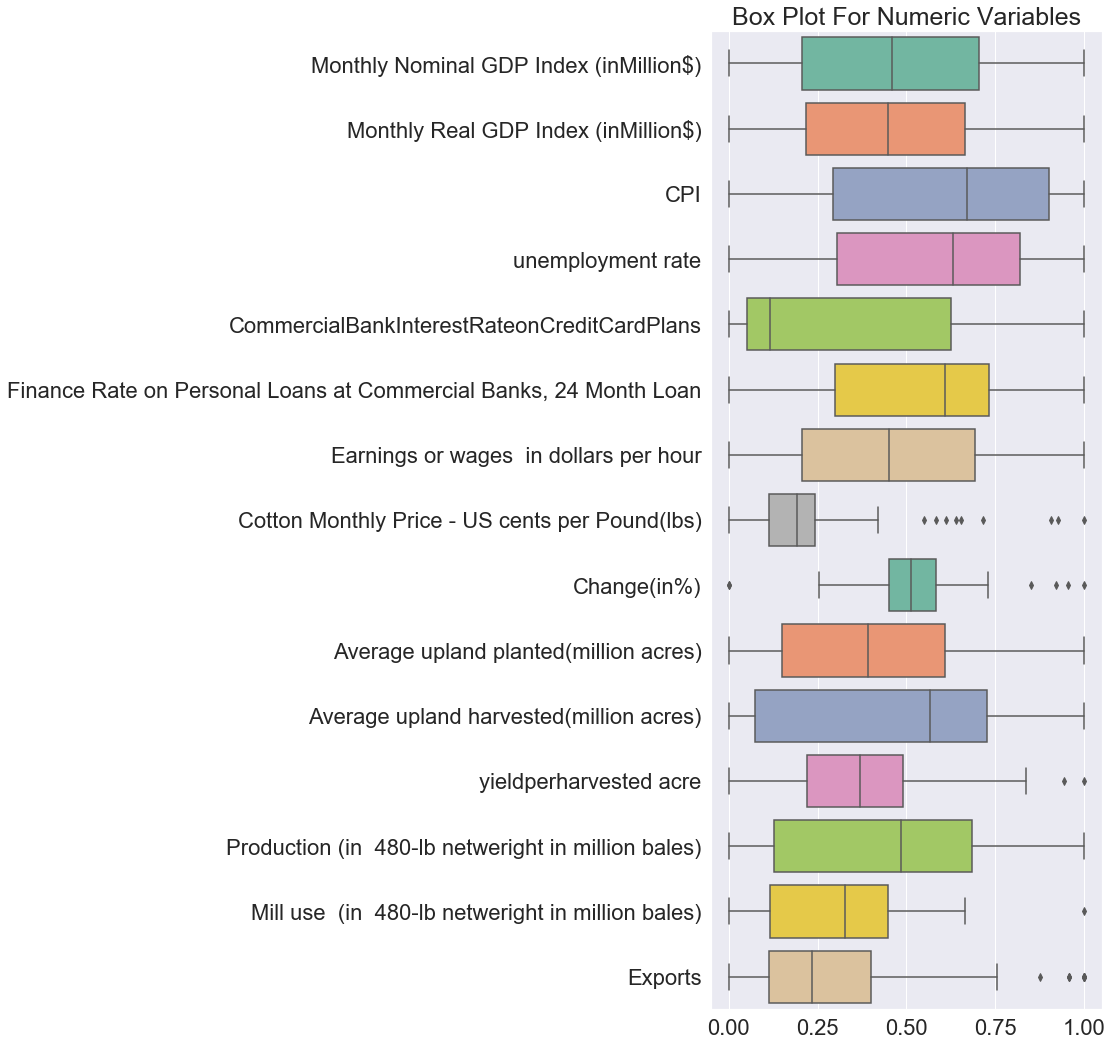

In [34]:
fig, ax = plt.subplots(figsize = (7,18))
sns.boxplot(data = num_cols_scaled, orient='h', palette='Set2')
sns.set(font_scale=2)
ax.set_title('Box Plot For Numeric Variables', fontsize = 25)
plt.show()

### Finding Correlations

In [35]:
corr = num_cols.corr()
corr.style.background_gradient()

,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
Monthly Nominal GDP Index (inMillion$),1,0.997417,0.959235,-0.956152,-0.78337,-0.835155,0.986787,-0.208562,-0.226574,0.0193618,0.0325404,-0.0906667,0.0158701,0.299169,-0.488749
Monthly Real GDP Index (inMillion$),0.997417,1,0.943493,-0.948336,-0.750267,-0.828176,0.982099,-0.203163,-0.214482,0.0098216,0.0491757,-0.104249,0.0286627,0.298861,-0.471631
CPI,0.959235,0.943493,1,-0.87805,-0.850575,-0.807173,0.94939,-0.12447,-0.294738,0.177438,0.0652722,-0.0341326,0.057672,0.193833,-0.473436
unemployment rate,-0.956152,-0.948336,-0.87805,1,0.787367,0.810887,-0.946724,0.338302,0.217833,0.114162,0.0998362,0.0961888,0.109757,-0.423596,0.552044
CommercialBankInterestRateonCreditCardPlans,-0.78337,-0.750267,-0.850575,0.787367,1,0.630589,-0.772433,0.260326,0.34763,-0.32725,-0.0303779,0.0162069,-0.0207462,-0.287147,0.507587
"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",-0.835155,-0.828176,-0.807173,0.810887,0.630589,1,-0.841899,0.271466,0.0583423,0.101536,0.172467,-0.0527603,0.132691,-0.120945,0.441278
Earnings or wages in dollars per hour,0.986787,0.982099,0.94939,-0.946724,-0.772433,-0.841899,1,-0.190196,-0.17978,0.00945483,0.00179827,-0.100621,-0.0168023,0.26876,-0.49097
Cotton Monthly Price - US cents per Pound(lbs),-0.208562,-0.203163,-0.12447,0.338302,0.260326,0.271466,-0.190196,1,0.135434,0.294267,0.519094,0.208716,0.532459,0.0093618,0.715185
Change(in%),-0.226574,-0.214482,-0.294738,0.217833,0.34763,0.0583423,-0.17978,0.135434,1,-0.248174,0.0127428,0.154055,0.0453677,-0.285562,0.320149
Average upland planted(million acres),0.0193618,0.0098216,0.177438,0.114162,-0.32725,0.101536,0.00945483,0.294267,-0.248174,1,0.605732,-0.0211478,0.549069,-0.0547675,0.111429


#### Observations

- "Unemployment Rate" have high Correlation With 
  "CommercialBankInterestRateonCreditCardPlans" and "Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan".


- "Earnings or wages in dollars per hour" have morethan 98% correlation With "Nominal" And "Real GDP" Columns.


- "Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan" has " -84% "  Correlation With "Earnings or wages in   dollars per hour"


- "Cotton Monthly Price - US cents per Pound(lbs)" has 71% "Correlation With Exports."

## Sales Data

### Load Data

In [36]:
trainDf = pd.read_csv('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Train.csv', na_values=[' '])
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [37]:
trainDf.isnull().sum()

Year                          0
Month                         0
ProductCategory               0
Sales(In ThousandDollars)    13
dtype: int64

### Fill Missing Values

- Fill Missing Values By Grouping On Product Category.

In [38]:
trainDf['Sales(In ThousandDollars)'] = trainDf.groupby('ProductCategory')['Sales(In ThousandDollars)'].apply(lambda x: x.fillna(x.mean()))
trainDf.isnull().any()

Year                         False
Month                        False
ProductCategory              False
Sales(In ThousandDollars)    False
dtype: bool

### Extract Date Column from "Year" and "Month" columns

In [39]:
trainDf['YearMonth'] = trainDf['Year'].map(str) + "-" + trainDf['Month'].map(str)
trainDf['YearMonth'] = pd.to_datetime(trainDf['YearMonth'], format='%Y-%m')
trainDf.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars),YearMonth
0,2009,1,WomenClothing,1755.0,2009-01-01
1,2009,1,MenClothing,524.0,2009-01-01
2,2009,1,OtherClothing,936.0,2009-01-01
3,2009,2,WomenClothing,1729.0,2009-02-01
4,2009,2,MenClothing,496.0,2009-02-01


### Monthly Product Category Sales

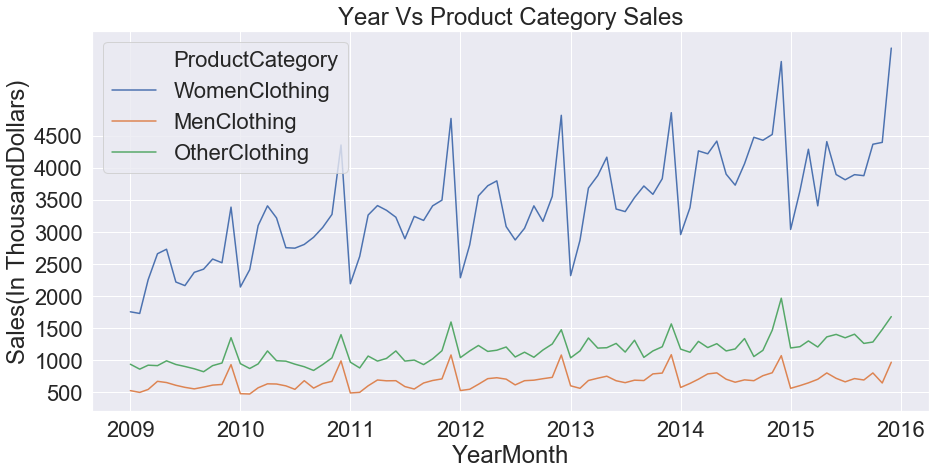

In [40]:
plt.subplots(figsize = (15, 7))
sns.lineplot(x="YearMonth", y="Sales(In ThousandDollars)", hue="ProductCategory", data = trainDf)
plt.yticks(np.arange(500,5000, 500))
plt.title('Year Vs Product Category Sales')
plt.show()

#### Observations

- WomenClothing Sales are increasing Every Year. It is observed that WemonClothing Sales has "Trend" and "Seasonality".


- MenClothing and OtherClothing Sales have very low increase with compared to WomenClothing. It is almost "Constant".


- But In common, all the three categories have high sales in December Month.


In [41]:
trainDf.dtypes

Year                                  int64
Month                                 int64
ProductCategory                      object
Sales(In ThousandDollars)           float64
YearMonth                    datetime64[ns]
dtype: object

### Reshape Sales Data

In [42]:
train_pivoted = pivot_table(trainDf, index = ['Year', 'Month'], values = ['Sales(In ThousandDollars)'], columns = ['ProductCategory'])
train_pivoted.head()

Sales(In ThousandDollars)                            
ProductCategory               MenClothing OtherClothing WomenClothing
Year Month                                                           
2009 1                              524.0         936.0        1755.0
     2                              496.0         859.0        1729.0
     3                              542.0         921.0        2256.0
     4                              669.0         914.0        2662.0
     5                              650.0         989.0        2732.0

#### Rename Columns

In [43]:
train_pivoted.columns = ['MenClothing_Sales', 'OtherClothing_Sales', 'WomenClothing_Sales']
train_pivoted = train_pivoted.reset_index()
train_pivoted.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
0,2009,1,524.0,936.0,1755.0
1,2009,2,496.0,859.0,1729.0
2,2009,3,542.0,921.0,2256.0
3,2009,4,669.0,914.0,2662.0
4,2009,5,650.0,989.0,2732.0


In [44]:
train_pivoted.shape

(84, 5)

### ACF & PACF plots
- Analysing WomenClothing_Sales using "Time Series" functions 

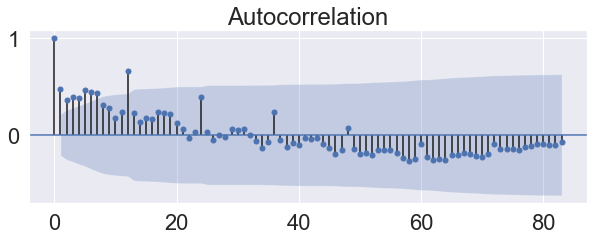

In [45]:
pyplot.figure(figsize=(10, 7))
pyplot.subplot(211)
plot_acf(train_pivoted['WomenClothing_Sales'], ax = pyplot.gca())
pyplot.show()

- From the above plot, it is observed that after every 12th point there is correlation.
Means WomenClothing Has seasonality, so Holt Winter's technique can be used.

- We can use ARIMA also as the WomenClothing has both Trend and Seasonality


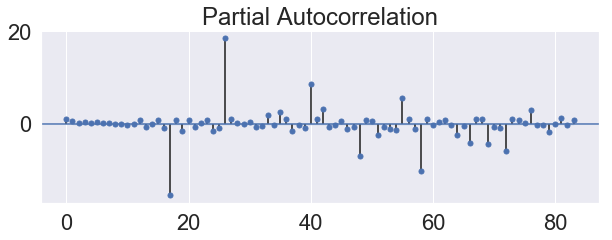

In [46]:
pyplot.figure(figsize=(10, 7))
pyplot.subplot(211)
plot_pacf(train_pivoted['WomenClothing_Sales'], ax = pyplot.gca())
pyplot.show()

In [47]:
train_pivoted.describe()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2012.000000,6.500000,678.950000,1143.506329,3409.812500
std,2.012012,3.472786,133.684388,210.143661,822.059859
min,2009.000000,1.000000,471.000000,819.000000,1729.000000
25%,2010.000000,3.750000,598.750000,984.750000,2855.750000
50%,2012.000000,6.500000,673.000000,1143.506329,3385.500000
75%,2014.000000,9.250000,711.250000,1258.000000,3886.500000
max,2015.000000,12.000000,1085.000000,1967.000000,5874.000000


#### Create Sales Column by adding all category sales

In [48]:
train_pivoted['Sales'] = train_pivoted['MenClothing_Sales']+train_pivoted['OtherClothing_Sales']+train_pivoted['WomenClothing_Sales']  
train_pivoted.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales
0,2009,1,524.0,936.0,1755.0,3215.0
1,2009,2,496.0,859.0,1729.0,3084.0
2,2009,3,542.0,921.0,2256.0,3719.0
3,2009,4,669.0,914.0,2662.0,4245.0
4,2009,5,650.0,989.0,2732.0,4371.0


### Distribution Plots

#### Distribution of Sales(In ThousandDollars)

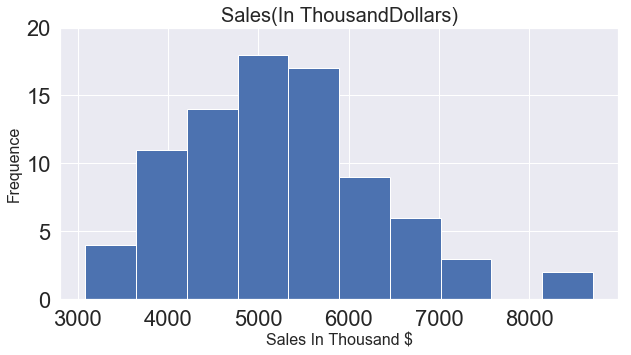

In [50]:
plt.subplots(figsize = (10, 5))
plt.hist(train_pivoted['Sales'])
plt.xlabel('Sales In Thousand $', fontdict={'size':16})
plt.ylabel('Frequence',  fontdict={'size':16})
plt.yticks(np.arange(0, 25, 5))
plt.title('Sales(In ThousandDollars)',  fontdict={'size':20})
plt.show()

#### Observations
- Sales Of all categories together have Normal Distribution

#### Individual Distributions Categorical Sales

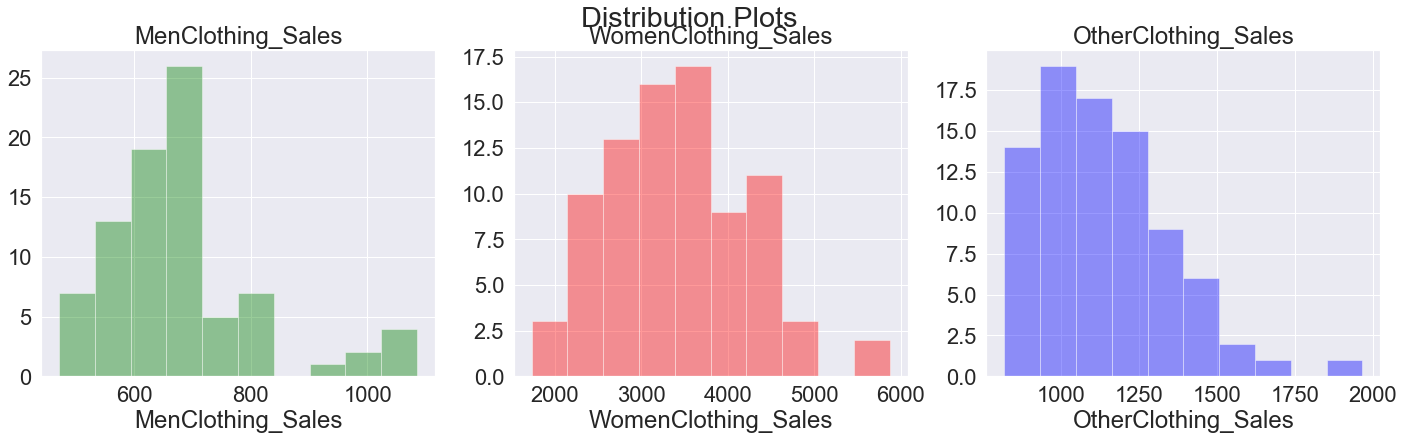

In [51]:
f, axes = plt.subplots(figsize=(24,6), nrows=1, ncols=3)

sns.distplot(train_pivoted.MenClothing_Sales, ax = axes[0], kde = False, color = 'green', bins=10).set_title('MenClothing_Sales')
sns.distplot(train_pivoted.WomenClothing_Sales, ax = axes[1], kde = False, color = 'red', bins=10).set_title("WomenClothing_Sales") 
sns.distplot(train_pivoted.OtherClothing_Sales, ax = axes[2], kde = False, color = 'blue', bins=10).set_title("OtherClothing_Sales") 

f.suptitle('Distribution Plots')
sns.set(font_scale = 1.8)
plt.show()

#### Observations

- WomenClothing Sales Follows "Normal Distrinution".


- OtherClothing has slightly "Right Skewness".


## Merge all Training Datasets 

In [52]:
trainingDataFull = pd.merge(train_pivoted, weatherData_avg, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
trainingDataFull = pd.merge(trainingDataFull, economincData, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
trainingDataFull = pd.merge(trainingDataFull, holiday_pivot, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

### Analyse The Target Variable With All the Features Of Training Dataset

In [272]:
trainingDataFull.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),...,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Event,Federal Holiday
0,2009,1,524.0,936.0,1755.0,3215.0,0.741935,-2.096774,-5.322581,-6.096774,...,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,0.0,2.0
1,2009,2,496.0,859.0,1729.0,3084.0,6.964286,2.785714,-1.642857,-2.464286,...,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,1.0,1.0
2,2009,3,542.0,921.0,2256.0,3719.0,9.838710,5.967742,1.774194,0.258065,...,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,NaN,NaN
3,2009,4,669.0,914.0,2662.0,4245.0,17.100000,12.733333,7.833333,6.233333,...,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,1.0,0.0
4,2009,5,650.0,989.0,2732.0,4371.0,21.354839,17.000000,12.483871,12.967742,...,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,1.0,1.0


#### Correlation Of All Variables With Target Variable

In [54]:
corr = trainingDataFull.corr()
corr.style.background_gradient()

#### Top 4 Correlations Of "Sales(In ThousandDollars)" with non-sales variables

In [55]:
corr_Sales = corr[['Sales']].sort_values('Sales', ascending=False).reset_index()
corr_Sales.head(10)

,index,Sales
0,Sales,1.000000
1,WomenClothing_Sales,0.990436
2,OtherClothing_Sales,0.904553
3,MenClothing_Sales,0.864588
4,Monthly Nominal GDP Index (inMillion$),0.711630
5,Monthly Real GDP Index (inMillion$),0.710515
6,Earnings or wages in dollars per hour,0.694507
7,CPI,0.683552
8,Year,0.653597
9,Event,0.539977


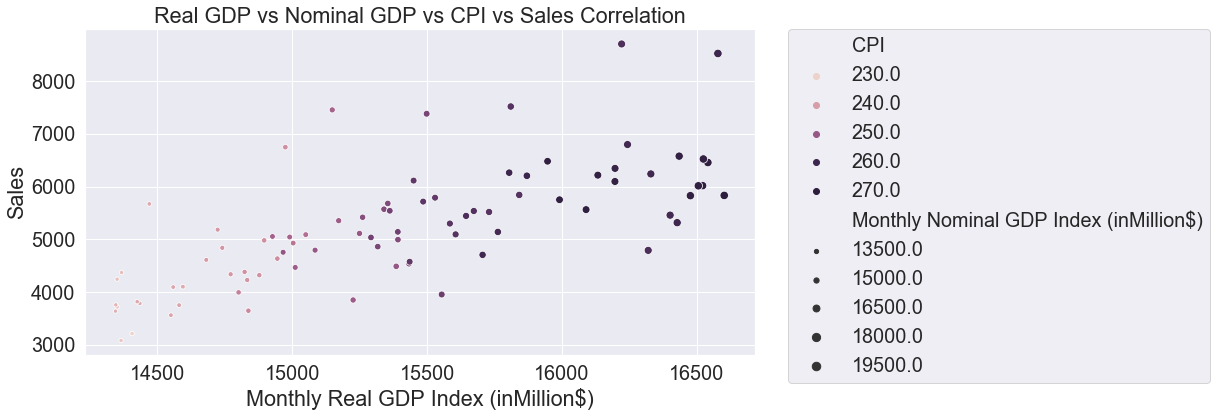

In [56]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='Sales', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs Sales Correlation')
plt.show()

#### Observations

- From the above Table Sales has 71.05% correlation with Real GDP Index, 71.16% correlation with CPI and 71% correlation With Nominal GDP Index and the same is observed in the plot above.


- It is clearly observed These variavles can be important variables for predicting Sales.

#### Correlations Of All the Variables With Sales(In ThousandDollars)

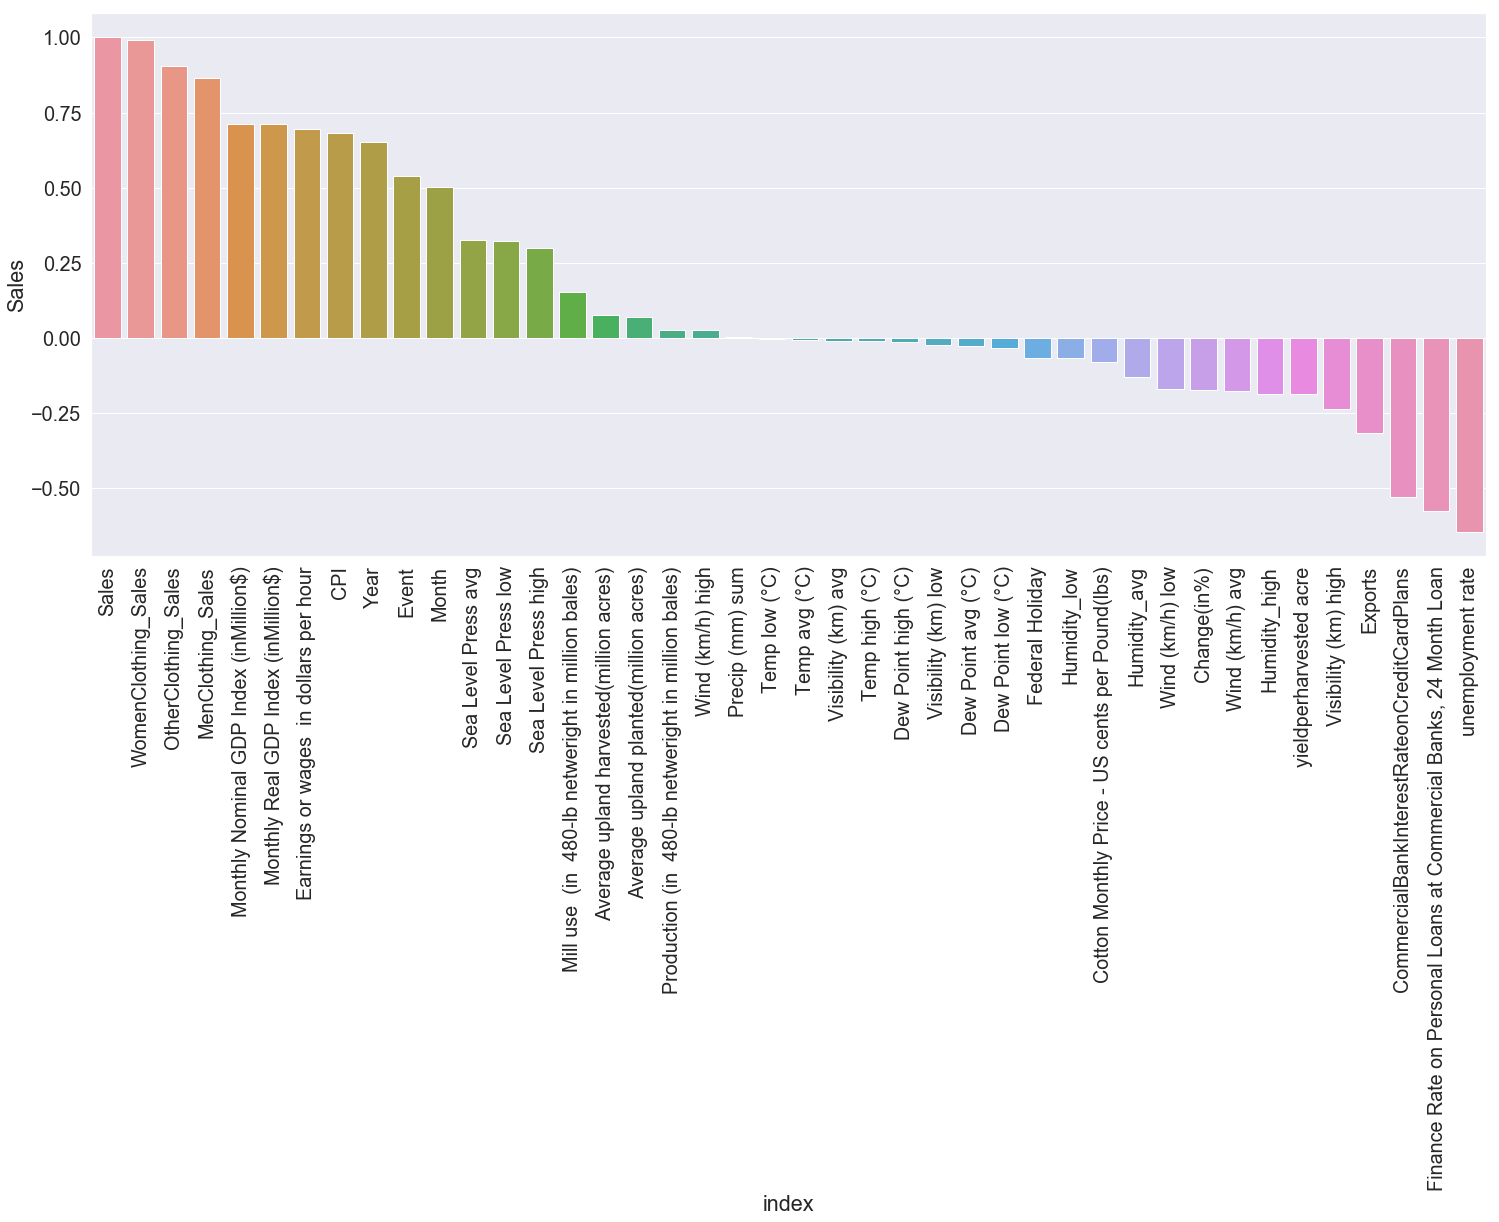

In [57]:
plt.subplots(figsize = (25, 10))
g = sns.barplot(x='index', y='Sales', data = corr_Sales)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()

#### Top 4 Correlations Of "MenClothing_Sales" otherthan sales variables

In [58]:
corr_men = corr[['MenClothing_Sales']].sort_values('MenClothing_Sales', ascending=False).reset_index()
corr_men.head(10)

,index,MenClothing_Sales
0,MenClothing_Sales,1.000000
1,Sales,0.864588
2,WomenClothing_Sales,0.813786
3,OtherClothing_Sales,0.787831
4,Event,0.650091
5,Month,0.636741
6,Monthly Nominal GDP Index (inMillion$),0.394155
7,Monthly Real GDP Index (inMillion$),0.390096
8,CPI,0.382205
9,Earnings or wages in dollars per hour,0.374101


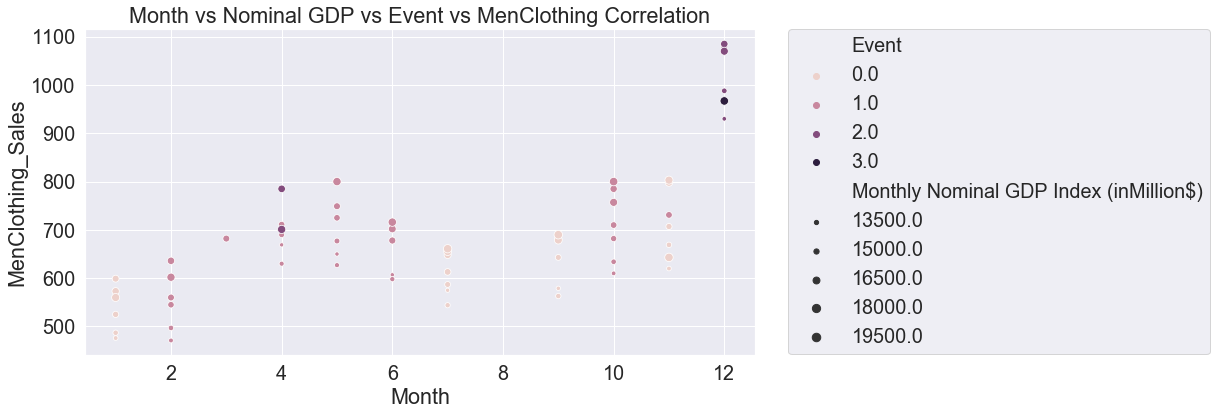

In [59]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Month', size='Monthly Nominal GDP Index (inMillion$)',
                y='MenClothing_Sales', hue = 'Event', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Month vs Nominal GDP vs Event vs MenClothing Correlation')
plt.show()

#### Observations 

- From the above Table Menclothing_Sales has 65% correlation with Event, 64% correlation with Month and 40% correlation With Nominal GDP Index and the same is observed from the above plot.


- It is clearly observed Event and Month variavles can be important for predicting MenClothing_Sales.

#### Top 4 Correlations Of "WomenClothing_Sales" otherthan sales variables

In [60]:
corr_men = corr[['WomenClothing_Sales']].sort_values('WomenClothing_Sales', ascending=False).reset_index()
corr_men.head(10)

,index,WomenClothing_Sales
0,WomenClothing_Sales,1.000000
1,Sales,0.990436
2,OtherClothing_Sales,0.848495
3,MenClothing_Sales,0.813786
4,Monthly Nominal GDP Index (inMillion$),0.727154
5,Monthly Real GDP Index (inMillion$),0.726710
6,Earnings or wages in dollars per hour,0.709473
7,CPI,0.703465
8,Year,0.671591
9,Event,0.498258


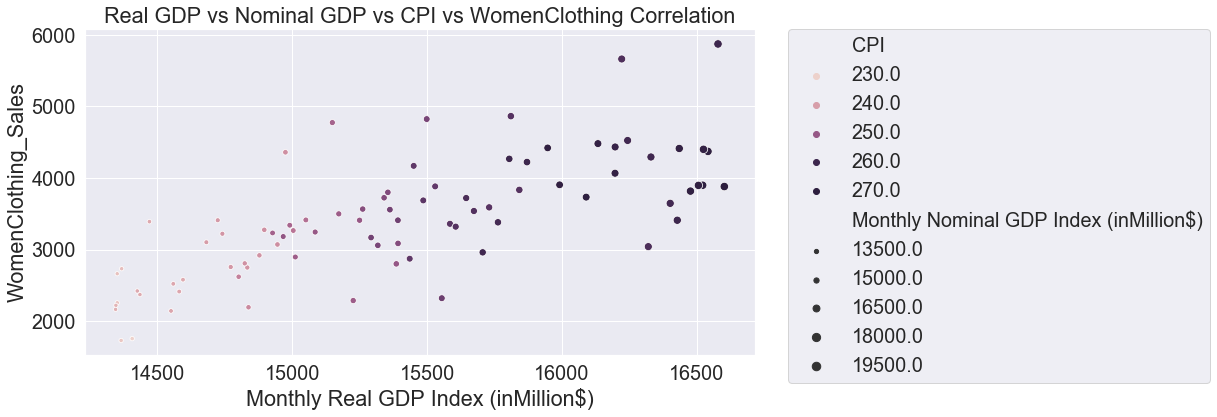

In [61]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='WomenClothing_Sales', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs WomenClothing Correlation')
plt.show()

#### Observations

- From the above Table Womenclothing_Sales has 72% correlation with Real GDP Index, 72% correlation with Nominal GDP Index and 70% CPI and the same is observed from the above plot.


- It is clearly observed, these variavles can be important for predicting MenClothing_Sales.

#### Top 4 Correlations Of "OtherClothing_Sales" otherthan sales variables

In [62]:
corr_others = corr[['OtherClothing_Sales']].sort_values('OtherClothing_Sales', ascending=False).reset_index() 
corr_others.head(10)

,index,OtherClothing_Sales
0,OtherClothing_Sales,1.000000
1,Sales,0.904553
2,WomenClothing_Sales,0.848495
3,MenClothing_Sales,0.787831
4,Monthly Nominal GDP Index (inMillion$),0.697020
5,Monthly Real GDP Index (inMillion$),0.695396
6,Earnings or wages in dollars per hour,0.687695
7,Year,0.655252
8,CPI,0.647660
9,Event,0.518436


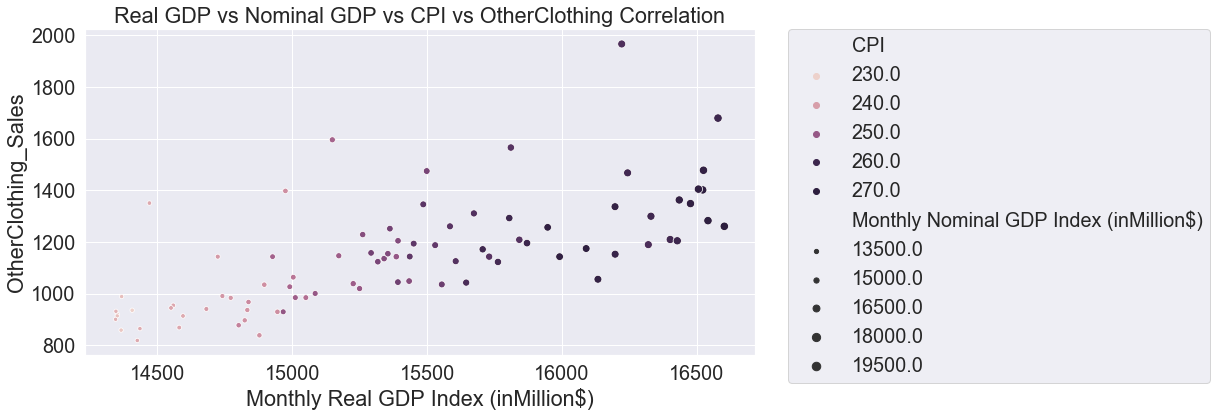

In [63]:
plt.subplots(figsize = (12, 6))
sns.scatterplot(x='Monthly Real GDP Index (inMillion$)', size='Monthly Nominal GDP Index (inMillion$)', 
                y='OtherClothing_Sales', hue='CPI', data = trainingDataFull)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Real GDP vs Nominal GDP vs CPI vs OtherClothing Correlation')
plt.show()

#### Observations

- From the above Table OtherClothing_Sales has 70% correlation CPI, 70% correlation with Nominal GDP Index and 70% correlation With Nominal GDP Index and the same is observed from the above plot.


- It is clearly observed, these variavles can be important for predicting OtherClothing_Sales.

### Correlations using Scatter Plots

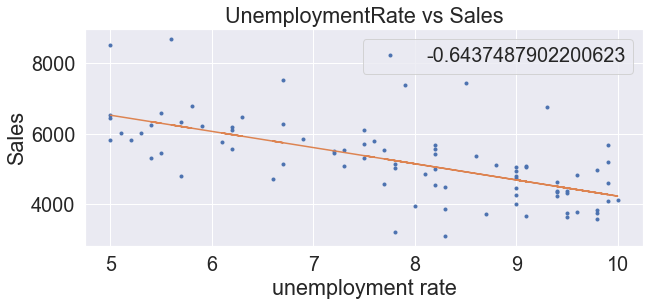

In [64]:
from numpy.polynomial.polynomial import polyfit

plt.subplots(figsize=(10, 4))
x = trainingDataFull['unemployment rate']
y = trainingDataFull['Sales']

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.legend([x.corr(y)])
plt.title('UnemploymentRate vs Sales')
plt.xlabel('unemployment rate')
plt.ylabel('Sales')
plt.show()

#### Observations

- Till now we have seen variables having positive high correlation with Sales variable.


- But there are variables holiding high negetive correlation also.


- Unemployment Rate has 64% negetive correlation with Sales.

### Exports vs Sales

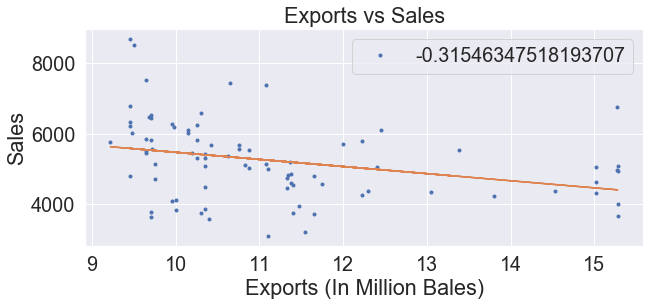

In [65]:
from numpy.polynomial.polynomial import polyfit

plt.subplots(figsize=(10, 4))
x = trainingDataFull['Exports']
y = trainingDataFull['Sales']

b, m = polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.legend([x.corr(y)])
plt.title('Exports vs Sales')
plt.xlabel('Exports (In Million Bales)')
plt.ylabel('Sales')
plt.show()

#### observations

- Cotton Exports has -31% correlation with Target i.e Sales.


- As the Exports increasing, Sales are Decreasing.  

### Interest Rates vs Sales

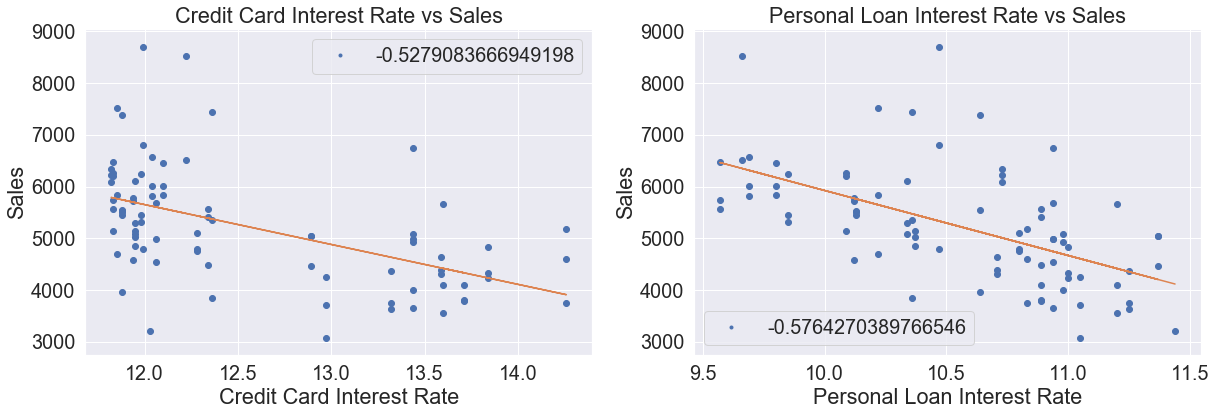

In [66]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize = (20,6))
#fig.autofmt_xdate(rotation = 45)
x1 = trainingDataFull['CommercialBankInterestRateonCreditCardPlans']
x2 = trainingDataFull['Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan']
y = trainingDataFull['Sales'] 

b, m = polyfit(x1, y, 1)
ax1.plot(x1, y, '.')
ax1.plot(x1, b + m * x1, '-')
ax1.legend([x1.corr(y)])

b1, m1 = polyfit(x2, y, 1)
ax2.plot(x2, y, '.')
ax2.plot(x2, b1 + m1 * x2, '-')
ax2.legend([x2.corr(y)])

ax1.scatter(x1, y)
ax1.set_xlabel('Credit Card Interest Rate'); ax1.set_ylabel('Sales'); ax1.set_title('Credit Card Interest Rate vs Sales')
ax2.scatter(x2, y)
ax2.set_xlabel('Personal Loan Interest Rate'); ax2.set_ylabel('Sales'); ax2.set_title('Personal Loan Interest Rate vs Sales')

plt.show()


#### Observations

- Here Credit Card Interest Rates has -53% correlation with Sales.

- With 2% change in InterestRates, Sales have come down by 2500 Million $ approximately.


- Personal Interest Rates also has -58% negetive correlation with Sales.


# Feature Extraction

## Combine Train and Test Data To Extract Features

## Weather Data

### Apply Same Preprocessing Steps done above to test data before concatenation

In [67]:
weather16 = pd.read_excel(weather, sheetname='2016', na_values=[' ', '-'])


In [68]:
weather16_noDay = weather16.copy().drop('Day', axis = 1)     # Drop Day column
print(weather16_noDay.shape)

(366, 22)


In [69]:
# Changeing  Column Names

weather16_noDay.columns = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)',
                        'Dew Point high (°C)', 'Dew Point avg (°C)', 'Dew Point low (°C)',
                       'Humidity_high', 'Humidity_avg', 'Humidity_low','Sea Level Press high', 'Sea Level Press avg',
                       'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
                       'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [70]:
# Replace Month Names With Numbers

vals_to_replace = {'Jan':'1','Feb':'2','Mar':'3','Apr':'4','May':'5','Jun':'6','Jul':'7','Aug':'8','Sep':'9','Oct':'10','Nov':'11','Dec':'12'}
weather16_noDay['Month'] = weather16_noDay['Month'].apply(lambda x: vals_to_replace[x])

In [71]:
# Replace T values with 0.01 im "Precip (mm) sum" Column

print("Nulls In (Precip (mm) sum) :", weather16_noDay['Precip (mm) sum'].isnull().sum())
weather16_noDay['Precip (mm) sum'] =   weather16_noDay['Precip (mm) sum'].apply(lambda x: 0.01 if x == 'T' else x)  
weather16_noDay['Precip (mm) sum'].isnull().sum()

Nulls In (Precip (mm) sum) : 0


0

In [72]:
# Convert dtypes of Columns

weather16_noDay.iloc[:, 2:-1] = weather16_noDay.iloc[:, 2:-1].apply(pd.to_numeric, errors = 'coerce')
weather16_noDay['Month'] = weather16_noDay['Month'].astype('int64')
weather16_noDay.dtypes

Year                      int64
Month                     int64
Temp high (°C)            int64
Temp avg (°C)             int64
Temp low (°C)             int64
Dew Point high (°C)       int64
Dew Point avg (°C)        int64
Dew Point low (°C)        int64
Humidity_high             int64
Humidity_avg              int64
Humidity_low              int64
Sea Level Press high    float64
Sea Level Press avg     float64
Sea Level Press low     float64
Visibility (km) high    float64
Visibility (km) avg     float64
Visibility (km) low     float64
Wind (km/h) low         float64
Wind (km/h) avg         float64
Wind (km/h) high        float64
Precip (mm) sum         float64
WeatherEvent             object
dtype: object

In [73]:
# Fill Missing Values

weather16_noDay.iloc[:, 2:-1] = weather16_noDay.iloc[:, 2:-1].apply(lambda x: x.fillna(x.mean()))
weather16_noDay.loc[:, 'WeatherEvent'] = weather16_noDay.loc[:, 'WeatherEvent'].fillna('Other')
weather16_noDay.isnull().sum()

Year                    0
Month                   0
Temp high (°C)          0
Temp avg (°C)           0
Temp low (°C)           0
Dew Point high (°C)     0
Dew Point avg (°C)      0
Dew Point low (°C)      0
Humidity_high           0
Humidity_avg            0
Humidity_low            0
Sea Level Press high    0
Sea Level Press avg     0
Sea Level Press low     0
Visibility (km) high    0
Visibility (km) avg     0
Visibility (km) low     0
Wind (km/h) low         0
Wind (km/h) avg         0
Wind (km/h) high        0
Precip (mm) sum         0
WeatherEvent            0
dtype: int64

### Concat Train and Test Weather Data 

In [74]:
weatherData_final = pd.concat([weatherData_noDay, weather16_noDay], axis=0)
print(weatherData_final.shape)
weatherData_final.isnull().any()

(2922, 22)


Year                    False
Month                   False
Temp high (°C)          False
Temp avg (°C)           False
Temp low (°C)           False
Dew Point high (°C)     False
Dew Point avg (°C)      False
Dew Point low (°C)      False
Humidity_high           False
Humidity_avg            False
Humidity_low            False
Sea Level Press high    False
Sea Level Press avg     False
Sea Level Press low     False
Visibility (km) high    False
Visibility (km) avg     False
Visibility (km) low     False
Wind (km/h) low         False
Wind (km/h) avg         False
Wind (km/h) high        False
Precip (mm) sum         False
WeatherEvent            False
dtype: bool

### Extracting New Features From Weather Data

In [75]:
col_list = ['Year', 'Month', 'Temp high (°C)', 'Temp avg (°C)', 'Temp low (°C)','Dew Point high (°C)', 'Dew Point avg (°C)', 
            'Dew Point low (°C)','Humidity_high', 'Humidity_avg', 'Humidity_low', 'Sea Level Press high','Sea Level Press avg',
            'Sea Level Press low', 'Visibility (km) high','Visibility (km) avg', 'Visibility (km) low', 'Wind (km/h) low',
            'Wind (km/h) avg', 'Wind (km/h) high', 'Precip (mm) sum','WeatherEvent']

In [76]:
features = {col_list[2]:['min','max','mean','var'],col_list[3]:['min','max','mean','var'],col_list[4]:['min','max','mean','var'],
           col_list[5]:['min','max','mean','var'], col_list[6]:['min','max','mean','var'], col_list[7]:['min','max','mean','var'],
           col_list[8]:['min','max','mean','var'], col_list[9]:['min','max','mean','var'], col_list[10]:['min','max','mean','var'],
col_list[11]:['min','max','mean','var'], col_list[12]:['min','max','mean','var'], col_list[13]:['min','max','mean','var'],
col_list[14]:['min','max','mean','var'], col_list[15]:['min','max','mean','var'], col_list[16]:['min','max','mean','var'],
col_list[17]:['min','max','mean','var'], col_list[18]:['min','max','mean','var'], col_list[19]:['min','max','mean','var']}

weather_features = weatherData_final.groupby(['Year','Month']).agg(features).reset_index()

In [77]:
weather_features.tail(5)

Year Month Temp high (°C)                             Temp avg (°C)        \
                          min   max       mean        var           min   max   
91  2016     8           26.0  36.0  30.354839   6.169892          22.0  32.0   
92  2016     9           15.0  33.0  26.166667  19.040230          14.0  28.0   
93  2016    10           11.0  29.0  18.774194  21.780645           7.0  24.0   
94  2016    11            5.0  22.0  13.633333  19.826437           3.0  18.0   
95  2016    12           -3.0  16.0   6.548387  17.722581          -6.0  10.0   

                             ...     Wind (km/h) low             \
         mean        var     ...                mean        var   
91  26.354839   5.303226     ...           18.240014  20.225839   
92  22.133333  12.809195     ...           20.433333  29.357471   
93  14.967742  18.832258     ...           20.580645  41.851613   
94   9.866667  13.154023     ...           22.300000  44.837931   
95   3.645161  14.636559     ...           24.677419  27.359140   

   Wind (km/h) avg                            Wind (km/h) high        \
               min   max      mean        var              min   max   
91             2.0  11.0  6.104548   4.846506             18.0  53.0   
92             3.0  18.0  7.833333  15.729885             19.0  50.0   
93             2.0  17.0  7.419355  13.384946             18.0  58.0   
94             3.0  21.0  8.400000  15.489655             21.0  63.0   
95             5.0  18.0  9.870968  10.316129             26.0  64.0   

                           
         mean         var  
91  31.689847   52.096926  
92  33.769877   65.586155  
93  34.612903  153.511828  
94  36.800000  146.579310  
95  39.906333   81.738646  

[5 rows x 74 columns]

#### Rename Columns

In [78]:
weather_features.columns = [x[0]+x[1] for x in weather_features.columns]
weather_features.head()

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Wind (km/h) lowmean,Wind (km/h) lowvar,Wind (km/h) avgmin,Wind (km/h) avgmax,Wind (km/h) avgmean,Wind (km/h) avgvar,Wind (km/h) highmin,Wind (km/h) highmax,Wind (km/h) highmean,Wind (km/h) highvar
0,2009,1,-9.0,8.0,0.741935,16.664516,-11.0,5.0,-2.096774,13.956989,...,27.000000,35.066667,4.0,18.0,12.000000,12.200000,21.0,60.0,39.322581,96.625806
1,2009,10,7.0,23.0,16.258065,20.064516,6.0,19.0,12.870968,14.582796,...,23.516129,42.724731,2.0,19.0,9.677419,16.025806,14.0,71.0,34.419355,110.918280
2,2009,11,10.0,21.0,13.733333,8.202299,7.0,16.0,10.800000,5.889655,...,25.866667,41.429885,4.0,25.0,11.133333,25.636782,21.0,63.0,36.733333,108.685057
3,2009,12,-2.0,19.0,5.451613,29.055914,-5.0,15.0,2.354839,24.303226,...,28.580645,36.651613,6.0,23.0,13.451613,19.189247,24.0,64.0,42.838710,97.473118
4,2009,2,-6.0,18.0,6.964286,30.850529,-9.0,13.0,2.785714,24.322751,...,27.928571,47.253968,6.0,22.0,12.214286,21.656085,24.0,77.0,41.642857,167.349206


In [79]:
weather_features.shape

(96, 74)

#### Reshape WeatherEvent Column

In [80]:
weatherData_final['dummy'] = 1

weatherEvent_pivot = pivot_table(data = weatherData_final, columns=['WeatherEvent'], index = ['Year', 'Month'], 
                                 values='dummy', aggfunc='sum', fill_value=0) 
                                
weatherEvent_pivot.columns = [i for i in weatherEvent_pivot.columns]
weatherEvent_pivot = weatherEvent_pivot.reset_index()
weatherEvent_pivot.tail()


,Year,Month,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Other,Rain,"Rain , Snow",Snow,Thunderstorm
91,2016,8,0,2,0,0,21,8,0,0,0
92,2016,9,0,2,0,0,23,5,0,0,0
93,2016,10,0,2,0,0,25,4,0,0,0
94,2016,11,0,2,0,0,22,5,1,0,0
95,2016,12,0,1,0,1,19,8,1,1,0


In [81]:
weatherData_full = weather_features.merge(weatherEvent_pivot, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='inner')
weatherData_full.head(3)

,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,Wind (km/h) highvar,Fog,"Fog , Rain","Fog , Rain , Snow","Fog , Snow",Other,Rain,"Rain , Snow",Snow,Thunderstorm
0,2009,1,-9.0,8.0,0.741935,16.664516,-11.0,5.0,-2.096774,13.956989,...,96.625806,0,0,2,2,21,3,0,3,0
1,2009,10,7.0,23.0,16.258065,20.064516,6.0,19.0,12.870968,14.582796,...,110.918280,0,1,0,0,17,13,0,0,0
2,2009,11,10.0,21.0,13.733333,8.202299,7.0,16.0,10.800000,5.889655,...,108.685057,0,0,0,0,20,10,0,0,0


## Events_Holidays Data

In [82]:
data1 = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\Events_HolidaysData.xlsx')
data1.head()

holiday_test = data1[data1['Year'] == 2016]
print("shape of holiday_test: ", holiday_test.shape)
holiday_test.tail()

shape of holiday_test:  (20, 4)


,Year,MonthDate,Event,DayCategory
145,2016,2024-11-01,Thanksgiving Day,Federal Holiday
146,2016,2024-12-01,Christmas Eve,Event
147,2016,2025-12-01,Christmas Day,Federal Holiday
148,2016,2026-12-01,'Christmas Day' observed,Federal Holiday
149,2016,1931-12-01,New Year's Eve,Event


### Extract Month & Day From MonthDate Column

In [83]:
holiday_test.MonthDate = holiday_test.MonthDate.astype(str).str[2:7]

holiday_test['Month'] = holiday_test['MonthDate'].str[3:5]
holiday_test['Day'] = holiday_test['MonthDate'].str[0:2]

#### Replace Month Names with Numbers

In [84]:
vals_to_replace1 = {'01':'1','02':'2','03':'3','04':'4','05':'5','06':'6','07':'7','08':'8','09':'9','10':'10','11':'11','12':'12'}
holiday_test['Month'] = holiday_test['Month'].apply(lambda x: vals_to_replace1[x])

### Reshape holiday_test
- Using Pivot Table to reshape the data.

In [85]:
holiday_test_pivot = pivot_table(holiday_test, index = ['Year', 'Month'], values = ['Day'], 
                                columns = ['DayCategory'], aggfunc=np.count_nonzero, fill_value=0)

In [86]:
holiday_test_pivot.columns = ['Event', 'Federal Holiday']
holiday_test_pivot = holiday_test_pivot.reset_index()
holiday_test_pivot.head()

,Year,Month,Event,Federal Holiday
0,2016,1,0,2
1,2016,10,1,1
2,2016,11,1,2
3,2016,12,2,2
4,2016,2,1,1


### Concat Train and Test

In [87]:
holiday_total = pd.concat([holiday_pivot, holiday_test_pivot])
holiday_total.head()

,Year,Month,Event,Federal Holiday
0,2009,1,0,2
1,2009,2,1,1
2,2009,4,1,0
3,2009,5,1,1
4,2009,6,1,0


### Column TypeCasting

In [88]:
holiday_total[['Year']] = holiday_total['Year'].astype('int64')
holiday_total[['Month']] = holiday_total['Month'].astype('int64')

### Extract New Features Event/Holiday Data

In [89]:
holiday_total['Event_Yes_No'] = holiday_total['Event'].apply(lambda x: 'No' if x==0 else 'Yes')
holiday_total['Federal Holiday_Yes_No'] = holiday_total['Federal Holiday'].apply(lambda x: 'No' if x==0 else 'Yes')
holiday_total.head()

,Year,Month,Event,Federal Holiday,Event_Yes_No,Federal Holiday_Yes_No
0,2009,1,0,2,No,Yes
1,2009,2,1,1,Yes,Yes
2,2009,4,1,0,Yes,No
3,2009,5,1,1,Yes,Yes
4,2009,6,1,0,Yes,No


## Macro Economic Data

In [90]:
macroEconomincData1 = pd.read_excel('C:\\Users\\HP\Desktop\\PHD Hackathon\\Data Science\\PhD_Train_Data\\MacroEconomicData.xlsx', 
                             na_values=['?', ' '], parse_dates=['Year-Month'])

macroEconomincData1.shape

(96, 18)

### Extract Month and Year Columns

In [91]:
macroEconomincData1['Year'] = macroEconomincData1['Year-Month'].dt.year
macroEconomincData1['Month'] = macroEconomincData1['Year-Month'].dt.month
macroEconomincData1.head(3)

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
0,2009-01-01,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137.0,57.70,4.02,9.296,7.559,799,12.589,4.17,11.55,2009,1
1,2009-02-01,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200.0,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.10,2009,2
2,2009-03-01,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,NaN,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.65,2009,3


In [92]:
economicData1 = macroEconomincData1[macroEconomincData1['Year'] == 2016]
economicData1.tail()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Year,Month
91,2016-08-01,18741.599947,16797.206610,264.160,Democrats,4.9,12.51,9.64,25.52,NaN,80.26,-0.99,9.824,9.340,787,15.314,3.575,10.950,2016,8
92,2016-09-01,18840.309646,16852.562745,264.602,Democrats,4.9,12.51,9.64,25.74,NaN,77.86,-2.99,9.950,9.464,790,15.580,3.475,10.950,2016,9
93,2016-10-01,18740.780023,16725.460098,264.738,Democrats,4.8,12.51,9.64,26.04,NaN,78.52,0.85,9.950,9.464,785,15.472,3.475,11.425,2016,10
94,2016-11-01,18960.461568,16910.896330,265.203,Democrats,4.6,12.41,9.45,25.87,NaN,78.92,0.51,9.950,9.464,791,15.600,3.475,11.425,2016,11
95,2016-12-01,19015.393408,16918.050624,265.421,Democrats,4.7,12.41,9.45,25.90,NaN,79.50,0.73,9.950,9.464,810,15.962,3.275,11.600,2016,12


### Drop Columns [  PartyInPower, Year-Month , AdvertisingExpenses (in Thousand Dollars)]

In [93]:
economicData1 = economicData1.drop('PartyInPower', axis=1)    # Contains Only One Value In It.
economicData1 = economicData1.drop('Year-Month', axis=1)      # Date and Month are Seperated as New Columns
economicData1 = economicData1.drop('AdvertisingExpenses (in Thousand Dollars)',axis=1)# Do not have proper correlation and had 85% nulls. 
economicData1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 84 to 95
Data columns (total 17 columns):
Monthly Nominal GDP Index (inMillion$)                               12 non-null float64
Monthly Real GDP Index (inMillion$)                                  12 non-null float64
CPI                                                                  12 non-null float64
unemployment rate                                                    12 non-null float64
CommercialBankInterestRateonCreditCardPlans                          12 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    12 non-null float64
Earnings or wages  in dollars per hour                               12 non-null float64
Cotton Monthly Price - US cents per Pound(lbs)                       12 non-null float64
Change(in%)                                                          12 non-null float64
Average upland planted(million acres)                                12 non-null float64
Averag

### Fill Outliers 
- Filling outliers with 99th percentile value

In [94]:
economicData1['Cotton Monthly Price - US cents per Pound(lbs)'] = economicData1['Cotton Monthly Price - US cents per Pound(lbs)'].where(economicData1['Cotton Monthly Price - US cents per Pound(lbs)'] < 79.5, 79.5)         
economicData1['Change(in%)'] = economicData1['Change(in%)'].where(economicData1['Change(in%)'] < 0.73, 0.73)    
economicData1['Change(in%)'] = economicData1['Change(in%)'].where(economicData1['Change(in%)'] > 0, 0)
economicData1['yieldperharvested acre'] = economicData1['yieldperharvested acre'].where(economicData1['yieldperharvested acre'] < 810, 810)
economicData1['Mill use  (in  480-lb netweright in million bales)'] = economicData1['Mill use  (in  480-lb netweright in million bales)'].where(economicData1['Mill use  (in  480-lb netweright in million bales)'] < 3.275, 3.275)
economicData1['Exports'] = economicData1['Exports'].where(economicData1['Exports'] < 11.6, 11.6)


# Model Building

## Seperate Train and Test Data

### Test Data

In [95]:
weather_features_test = weather_features[weather_features['Year'] == 2016]
holidays_features_test = holiday_total[holiday_total['Year'] == 2016]
economic_features_test = economicData1.copy()

In [96]:
print('holidays_features :', holidays_features_test.shape)
print('economic_features :', economic_features_test.shape)
print('weather_features :', weather_features_test.shape)

holidays_features : (11, 6)
economic_features : (12, 17)
weather_features : (12, 74)


In [97]:
test_data = weather_features_test.merge(holidays_features_test, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
test_data = test_data.merge(economic_features_test, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

In [98]:
print(test_data.shape)
test_data.head()

(12, 93)


,Year,Month,Temp high (°C)min,Temp high (°C)max,Temp high (°C)mean,Temp high (°C)var,Temp avg (°C)min,Temp avg (°C)max,Temp avg (°C)mean,Temp avg (°C)var,...,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2016,1,-3.0,15.0,4.870968,20.249462,-7.0,10.0,1.483871,18.058065,...,9.66,25.50,68.75,0.00,8.422,7.922,758,12.508,3.275,9.525
1,2016,2,-9.0,16.0,7.103448,50.524631,-14.0,12.0,3.241379,43.118227,...,10.03,25.49,66.57,0.00,8.422,7.922,758,12.508,3.275,9.050
2,2016,3,2.0,26.0,14.161290,36.673118,-1.0,22.0,9.483871,25.391398,...,10.03,25.49,65.46,0.00,8.422,7.903,760,12.508,3.275,9.050
3,2016,4,6.0,28.0,16.800000,36.924138,2.0,22.0,11.966667,27.067816,...,10.03,25.60,69.28,0.73,8.422,7.903,756,12.440,3.275,9.025
4,2016,5,11.0,33.0,21.258065,45.197849,9.0,28.0,17.193548,31.894624,...,9.65,25.68,70.28,0.73,8.422,7.920,755,12.455,3.275,8.500


### Train Data

In [99]:
weather_features_train = weather_features[weather_features['Year'] != 2016]
holidays_features_train = holiday_total[holiday_total['Year'] != 2016]
economic_features_train = economicData1.copy()

In [100]:
print('holidays_features :', holidays_features_train.shape)
print('economic_features :', economic_features_train.shape)
print('weather_features :', weather_features_train.shape)

holidays_features : (70, 6)
economic_features : (12, 17)
weather_features : (84, 74)


### Seperating WomenClothing_Sales
- Here our aim is to predict the Women Clothing Sales using Regression Models.
- Hence we will seperate WomenClothing_Sales Column along with "Year" and "Month" columns.

In [120]:
womenClothing_sales = train_pivoted.copy().drop(['MenClothing_Sales', 'OtherClothing_Sales', 'Sales'], axis = 1)
womenClothing_sales.head()

,Year,Month,WomenClothing_Sales
0,2009,1,1755.0
1,2009,2,1729.0
2,2009,3,2256.0
3,2009,4,2662.0
4,2009,5,2732.0


In [121]:
train_data = womenClothing_sales.merge(holidays_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(economic_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')
train_data = train_data.merge(weather_features_train, left_on=['Year', 'Month'], right_on=['Year', 'Month'], how='left')

In [122]:
print(train_data.shape)
train_data.head()

(84, 94)


,Year,Month,WomenClothing_Sales,Event,Federal Holiday,Event_Yes_No,Federal Holiday_Yes_No,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,...,Wind (km/h) lowmean,Wind (km/h) lowvar,Wind (km/h) avgmin,Wind (km/h) avgmax,Wind (km/h) avgmean,Wind (km/h) avgvar,Wind (km/h) highmin,Wind (km/h) highmax,Wind (km/h) highmean,Wind (km/h) highvar
0,2009,1,1755.0,0.0,2.0,No,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,1729.0,1.0,1.0,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009,3,2256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009,4,2662.0,1.0,0.0,Yes,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009,5,2732.0,1.0,1.0,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Train validation Split

In [ ]:
X = train_data.copy().drop(['WomenClothing_Sales', 'Event_Yes_No', 'Federal Holiday_Yes_No'], axis = 1)
Y = train_data['WomenClothing_Sales']
Y1 = train_data['Year']
test_data = test_data.drop(['Event_Yes_No', 'Federal Holiday_Yes_No'], axis=1)

#### Fill Missing Values

In [124]:
X = X.fillna(0)
test_data = test_data.fillna(0)

In [125]:
trainX_fold, valX_fold, trainY_fold, valY_fold =  train_test_split(X, Y1, test_size=0.2, random_state=42, shuffle=False)

y_train, y_val = Y.loc[trainY_fold.index], Y.loc[valY_fold.index]

### Mean Absolute Percentage Error (MAPE) Function
- Here We are using MAPE as error metric for this problem.
- The reason is it is easy to understandable by business people in terms of Percntages where as rmse and mae have no units to measure the error.
- Intuitively also MAPE can give better idea sales which is in million $.

In [269]:
print(trainX_fold.shape)
type(y_train)

(67, 91)


pandas.core.series.Series

In [127]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Light GBM

In [128]:
def run_lgb(train_X, train_y, val_X, val_y):
    param = {'num_leaves': 30,
#              'min_data_in_leaf': 100,
             'objective': 'regression',
             'max_depth': 8,
             'learning_rate': 0.01,
             "boosting": "gbdt",
             "feature_fraction": 0.7,
             "bagging_freq": 1,
             "bagging_fraction": 0.7,
             "bagging_seed": 11,
             "metric": 'mape',
             # "lambda_l1": 0.2634,
             "random_state": 133,
             "verbosity": -1}

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    evals_result = {}
    model = lgb.train(param, lgtrain, 2000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100,
                      evals_result=evals_result)
    return model, evals_result

In [129]:
model, evals_result = run_lgb(trainX_fold, y_train, valX_fold, y_val)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's mape: 0.207139
[200]	valid_0's mape: 0.191985
[300]	valid_0's mape: 0.180085
[400]	valid_0's mape: 0.16958
[500]	valid_0's mape: 0.161557
[600]	valid_0's mape: 0.155266
[700]	valid_0's mape: 0.150352
[800]	valid_0's mape: 0.147703
[900]	valid_0's mape: 0.144992
[1000]	valid_0's mape: 0.144126
[1100]	valid_0's mape: 0.14347
[1200]	valid_0's mape: 0.14195
[1300]	valid_0's mape: 0.140932
[1400]	valid_0's mape: 0.140416
[1500]	valid_0's mape: 0.139544
[1600]	valid_0's mape: 0.140039
Early stopping, best iteration is:
[1543]	valid_0's mape: 0.138677


### Predict On Test Data

In [130]:
test_results = pd.DataFrame({'Sales(In ThousandDollars)': model.predict(test_data)})
test_results

,Sales(In ThousandDollars)
0,3086.638328
1,3086.638328
2,3592.703812
3,3592.703812
4,3629.557283
5,3571.858453
6,3978.305550
7,4050.555749
8,4050.555749
9,4050.555749


### Random Forest

In [131]:
rf_model = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

rf_model.fit(trainX_fold , y_train)    # Fit Model On Train Data
y_pred = rf_model.predict(valX_fold)   # Predict on Validation Data


## Feature Selection

### Feature Selection Through Feature Importance
- Selecting Important Features From Random Forest feature_importance.
- Selecting only those features which have atleast 0.1% importance.

#### Take Imp_Features

In [132]:
X_cols = trainX_fold.columns

feature_imp_RFC = pd.DataFrame({"imp_features":rf_model.feature_importances_, "columns":X_cols})
feature_imp_RFC.sort_values(by = 'imp_features', ascending=False)

,columns,imp_features
0,Year,0.415045
1,Month,0.330663
2,Event,0.160743
3,Federal Holiday,0.093549
58,Sea Level Press highvar,0.000000
66,Sea Level Press lowvar,0.000000
65,Sea Level Press lowmean,0.000000
64,Sea Level Press lowmax,0.000000
63,Sea Level Press lowmin,0.000000
62,Sea Level Press avgvar,0.000000


In [133]:
top_features = feature_imp_RFC[feature_imp_RFC['imp_features'] >= 0.01]
top_features.head()

,columns,imp_features
0,Year,0.415045
1,Month,0.330663
2,Event,0.160743
3,Federal Holiday,0.093549


In [137]:
## Select Imp_columns For Train Data
imp_columns_train = pd.DataFrame()
for i in top_features['columns'].values:
    imp_columns_train[i] = trainX_fold[i]
    
    
## Select Imp_columns For Validation Data
imp_columns_val = pd.DataFrame()
for i in top_features['columns'].values:
    imp_columns_val[i] = valX_fold[i]

    
## Select Imp_columns For Test Data
imp_columns_test = pd.DataFrame()
for i in top_features['columns'].values:
    imp_columns_test[i] = test_data[i]

### Random Forest Regressor With Imp_Features

In [138]:
rf_model.fit(imp_columns_train, y_train)     # Fit Model On Train Data
y_pred1 = rf_model.predict(imp_columns_val)  # Predict On Validation Data

mean_absolute_percentage_error(y_val, y_pred1) # MAPE

13.618076673604449

### Predict Test Data

In [139]:
rf_model.predict(imp_columns_test)   # Predict On Test Data

test_predictions = pd.DataFrame({'Sales(In ThousandDollars)': rf_model.predict(imp_columns_test)})
test_predictions

,Sales(In ThousandDollars)
0,2758.172031
1,3169.569531
2,3821.204219
3,3852.425000
4,3912.810156
5,3762.620781
6,3659.517344
7,3675.458281
8,3705.376250
9,3759.309219


### Parameter Tuning For Random Forest

In [273]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 8, 10, 12],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [3, 5, 8, 10, 12],
    'n_estimators': [20, 30, 40, 50]
}

rf = RandomForestRegressor()
rf_grid = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1)

rf_grid.fit(imp_columns_train, y_train)     # Fit Model On Train Data

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [3, 5, 8, 10, 12], 'max_features': ['sqrt', 'log2', 'auto'], 'min_samples_leaf': [2, 3, 4, 5], 'min_samples_split': [3, 5, 8, 10, 12], 'n_estimators': [20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [141]:
# Taking Best parameters From GridSearchCV

rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 50}

### Build RF Model With Best Parameters

In [142]:
rf_model_best = RandomForestRegressor(bootstrap=True, max_depth=10, max_features='log2', min_samples_leaf=2, 
                                     min_samples_split=3, n_estimators=50)

rf_model_best.fit(imp_columns_train, y_train)    # Fit Model On Train Data
preds = rf_model_best.predict(imp_columns_val)   # Fit Model On validation Data
mean_absolute_percentage_error(y_val, preds)     # MAPE

13.23696660824068

### Predict On Test Data

In [143]:
test_preds_rf = pd.DataFrame({'Sales(In ThousandDollars)': rf_model_best.predict(imp_columns_test)})
test_preds_rf

,Sales(In ThousandDollars)
0,2833.621545
1,3262.031635
2,3868.251604
3,3880.039063
4,3973.842238
5,3779.860292
6,3665.131810
7,3673.177429
8,3708.023530
9,3767.412208


#### Observations

- From The above predictions of Random Forest Models, we can observe that, Random Forest with Imp_Features is giving good predictions than using all the variables.
- Tuned Parameters using GridSearchCV.


#### Scores:
- Before Tuning Validation Score (MAPE) = 13.61 
- Validation Score (MAPE) = 13.23                  # Slight change in Score.
- Test Score (MAPE) = 11.5

### Gradient Boosting Machine ( GBM )

In [144]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(trainX_fold, y_train)

val_predictions = model_gbr.predict(valX_fold)
mean_absolute_percentage_error(y_val, val_predictions)

7.87468305594075

In [145]:
test_preds = pd.DataFrame({'Sales(In ThousandDollars)': model_gbr.predict(test_data)})
test_preds

,Sales(In ThousandDollars)
0,3015.722407
1,3315.538829
2,4230.885780
3,4325.872182
4,4430.149456
5,3914.257978
6,3886.950338
7,3981.033162
8,4075.110442
9,4045.175899


### GBM With rf_model Imp_features

In [146]:
model_gbr = GradientBoostingRegressor()
model_gbr.fit(imp_columns_train, y_train)

val_predictions = model_gbr.predict(imp_columns_val)
mean_absolute_percentage_error(y_val, val_predictions)

7.6624171406331225

### Predict On Test

In [147]:
test_preds1 = pd.DataFrame({'Sales(In ThousandDollars)': model_gbr.predict(imp_columns_test)})
test_preds1

,Sales(In ThousandDollars)
0,2976.409211
1,3394.836688
2,4160.525025
3,4313.079702
4,4405.945920
5,3827.526347
6,3743.534944
7,3900.222724
8,4024.642345
9,3952.633793


### MAPE Score On Test Data

#### Scores:
- Validation Score (MAPE) = 7.66
- Test Score (MAPE) = 10.5

### Parameter Tuning For GBM

In [274]:
parameters = {
    "criterion": ["friedman_mse",'mae'],
    "loss":['ls', 'lad', 'huber', 'quantile'],
    "learning_rate": [0.025, 0.05, 0.075, 0.1, 0.15],
    "max_depth":[3,5,8],
    "n_estimators":[10, 15, 20],
    "min_samples_split":[2,3,4,5,6]
    }

gbc = GradientBoostingRegressor()
gbc_grid = GridSearchCV(gbc, parameters, cv=5, n_jobs=-1)
gbc_grid.fit(imp_columns_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['friedman_mse', 'mae'], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.025, 0.05, 0.075, 0.1, 0.15], 'max_depth': [3, 5, 8], 'n_estimators': [10, 15, 20], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
gbc_grid.best_params_

{'criterion': 'mae',
 'learning_rate': 0.15,
 'loss': 'huber',
 'max_depth': 5,
 'min_samples_split': 3,
 'n_estimators': 20}

In [150]:
### Select Best parameters from GridSearchCV

gbc_best = GradientBoostingRegressor(criterion='mae',
                                        learning_rate = 0.15,
                                        loss = 'huber',
                                        max_depth = 5,
                                        min_samples_split = 3,
                                        n_estimators =20)

gbc_best.fit(imp_columns_train, y_train)       # Fit Model On Train Data
y_cap = gbc_best.predict(imp_columns_val)      # Predict on Validation Data
mean_absolute_percentage_error(y_val, y_cap)   # MAPE

9.678952660712813

### Predict On Test Data

In [151]:
test_preds2 = pd.DataFrame({'Sales(In ThousandDollars)': gbc_best.predict(imp_columns_test)})
test_preds2

,Sales(In ThousandDollars)
0,2965.398380
1,3366.912927
2,4209.080793
3,4209.080793
4,4329.897596
5,3840.942083
6,3696.372401
7,3737.018248
8,3737.018248
9,3719.411595


#### Observations

- From The Above GBM Models, we can observe that, GBM with default parameters is giving good predictions than Tuned GBM Model with imp_Features Taken From Random Forest.

# Time Series 

## Predict All The Three Categorical Clothing Sales Using Time Series Models

In [152]:
sales = train_pivoted.copy()
sales.head()

,Year,Month,MenClothing_Sales,OtherClothing_Sales,WomenClothing_Sales,Sales
0,2009,1,524.0,936.0,1755.0,3215.0
1,2009,2,496.0,859.0,1729.0,3084.0
2,2009,3,542.0,921.0,2256.0,3719.0
3,2009,4,669.0,914.0,2662.0,4245.0
4,2009,5,650.0,989.0,2732.0,4371.0


In [153]:
sales.isnull().sum()

Year                   0
Month                  0
MenClothing_Sales      0
OtherClothing_Sales    0
WomenClothing_Sales    0
Sales                  0
dtype: int64

### Create Data Column

In [158]:
sales['YearMonth'] = sales['Year'].map(str)+'-'+sales['Month'].map(str)
sales['YearMonth'] = pd.to_datetime(sales.YearMonth, format = '%Y-%m')

### Seperate MenClothing_Sales, OtherClothing_Sales, WomenClothing_Sales

In [159]:
men_clothing_sales = sales.copy().drop(['OtherClothing_Sales', 'WomenClothing_Sales', 'Sales'], axis=1)
women_clothing_sales = sales.copy().drop(['OtherClothing_Sales', 'Sales', 'MenClothing_Sales'], axis=1)
other_clothing_sales = sales.copy().drop(['WomenClothing_Sales', 'Sales', 'MenClothing_Sales'], axis=1)

men_clothing_sales.head(), women_clothing_sales.head(), other_clothing_sales.head()

(   Year  Month  MenClothing_Sales  YearMonth
 0  2009      1              524.0 2009-01-01
 1  2009      2              496.0 2009-02-01
 2  2009      3              542.0 2009-03-01
 3  2009      4              669.0 2009-04-01
 4  2009      5              650.0 2009-05-01,
    Year  Month  WomenClothing_Sales  YearMonth
 0  2009      1               1755.0 2009-01-01
 1  2009      2               1729.0 2009-02-01
 2  2009      3               2256.0 2009-03-01
 3  2009      4               2662.0 2009-04-01
 4  2009      5               2732.0 2009-05-01,
    Year  Month  OtherClothing_Sales  YearMonth
 0  2009      1                936.0 2009-01-01
 1  2009      2                859.0 2009-02-01
 2  2009      3                921.0 2009-03-01
 3  2009      4                914.0 2009-04-01
 4  2009      5                989.0 2009-05-01)

In [160]:
type(men_clothing_sales), type(women_clothing_sales), type(other_clothing_sales)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

#### Set YearMonth column as Index

In [161]:
def set_index_YearMonth(df):
    df_index = pd.DataFrame(df.set_index('YearMonth'))
    return pd.DataFrame(df_index)

In [162]:
women_clothing_sales = set_index_YearMonth(women_clothing_sales)
men_clothing_sales = set_index_YearMonth(men_clothing_sales)
other_clothing_sales = set_index_YearMonth(other_clothing_sales)

#### Yearly Mean Sales

In [163]:
def yearly_mean_sales(df, var):
    temp1 = df.groupby(['Year'])[var].mean()
    temp1.plot(figsize=(15,5), title= 'Yearwise Mean Sales_'+var, fontsize=14)

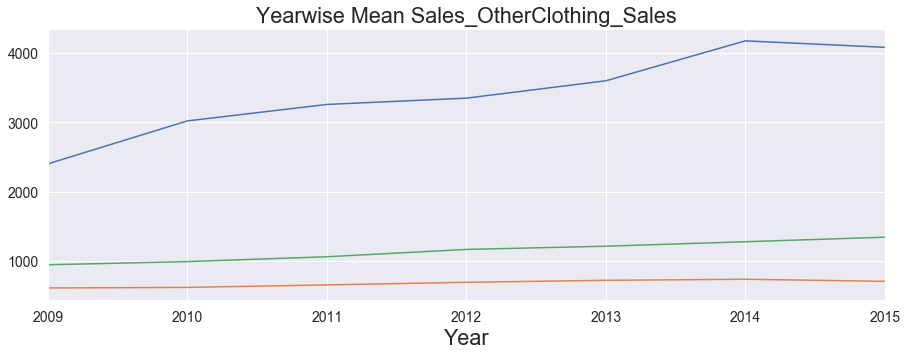

In [164]:
yearly_mean_sales(women_clothing_sales, 'WomenClothing_Sales')
yearly_mean_sales(men_clothing_sales, 'MenClothing_Sales')
yearly_mean_sales(other_clothing_sales, 'OtherClothing_Sales')

#### Monthly Mean Sales

In [165]:
def monthly_mean_sales(df, var):
    temp1 = df.groupby(['Year', 'Month'])[var].mean()
    temp1.plot(figsize=(15,5), title= 'Monthwise Mean Sales_'+var, fontsize=14)

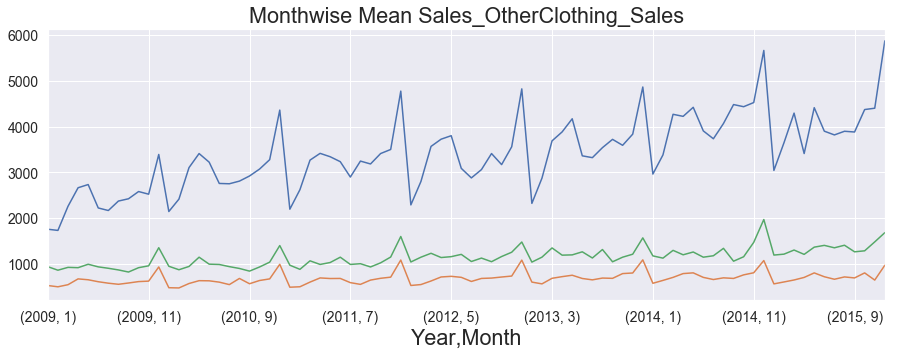

In [166]:
monthly_mean_sales(women_clothing_sales, 'WomenClothing_Sales')
monthly_mean_sales(men_clothing_sales, 'MenClothing_Sales')
monthly_mean_sales(other_clothing_sales, 'OtherClothing_Sales')

### Train Test Split

- To Devide The Data into Train and Validation sets, we will take from 2019-2014 as Training, and 2015 as Testing.
- If we would have done it randomly it may work well for the train dataset but will not work effectively on validation dataset.
- Because time Series Predictions depend on the recent sales to Predict Future Sales.

In [167]:
def split_data_train(df):
    df1 = df.ix['2009-01-01':'2014-12-01']
    return pd.DataFrame(df1)

def split_data_validation(df):
    df2 = df.ix['2015-01-01':'2015-12-01']
    return pd.DataFrame(df2)

In [168]:
# Train Data

women_clothing_train = split_data_train(women_clothing_sales)
men_clothing_train = split_data_train(men_clothing_sales)
other_clothing_train = split_data_train(other_clothing_sales)

In [169]:
women_clothing_train.shape, men_clothing_train.shape, other_clothing_train.shape

((72, 3), (72, 3), (72, 3))

In [170]:
men_clothing_train.head(7)

,Year,Month,MenClothing_Sales
YearMonth,,,
2009-01-01,2009,1,524.0
2009-02-01,2009,2,496.0
2009-03-01,2009,3,542.0
2009-04-01,2009,4,669.0
2009-05-01,2009,5,650.0
2009-06-01,2009,6,607.0
2009-07-01,2009,7,575.0


In [171]:
# validation Data

women_clothing_valid = split_data_validation(women_clothing_sales)
men_clothing_valid = split_data_validation(men_clothing_sales)
other_clothing_valid = split_data_validation(other_clothing_sales)

In [172]:
women_clothing_valid.shape, men_clothing_valid.shape, other_clothing_valid.shape  

((12, 3), (12, 3), (12, 3))

In [173]:
women_clothing_valid.head()

,Year,Month,WomenClothing_Sales
YearMonth,,,
2015-01-01,2015,1,3041.0000
2015-02-01,2015,2,3646.0000
2015-03-01,2015,3,4294.0000
2015-04-01,2015,4,3409.8125
2015-05-01,2015,5,4413.0000


### Reset Index

In [174]:
women_clothing_train = women_clothing_train.reset_index()
men_clothing_train = men_clothing_train.reset_index()
other_clothing_train = other_clothing_train.reset_index()

women_clothing_valid = women_clothing_valid.reset_index()
men_clothing_valid = men_clothing_valid.reset_index()
other_clothing_valid = other_clothing_valid.reset_index()

### Check Whether The Time Series Is Stationary Or Not
- We use Dickey Fuller test to check the stationarity of the series.
- The intuition behind this test is that it determines how strongly a time series is defined by a trend.

In [175]:
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24) 
    rolstd = pd.rolling_std(timeseries, window=24)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

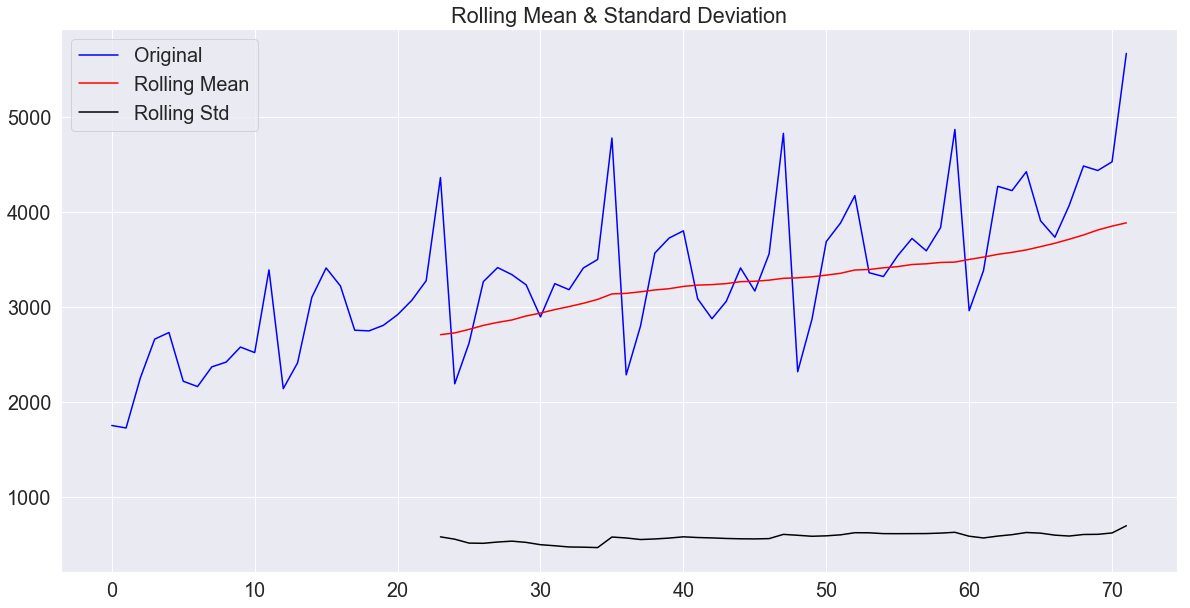

Results of Dickey-Fuller Test:
Test Statistic                  0.334121
p-value                         0.978857
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [176]:
rcParams['figure.figsize'] = 20,10

test_stationarity(women_clothing_train['WomenClothing_Sales'])

### Decompose Time Series

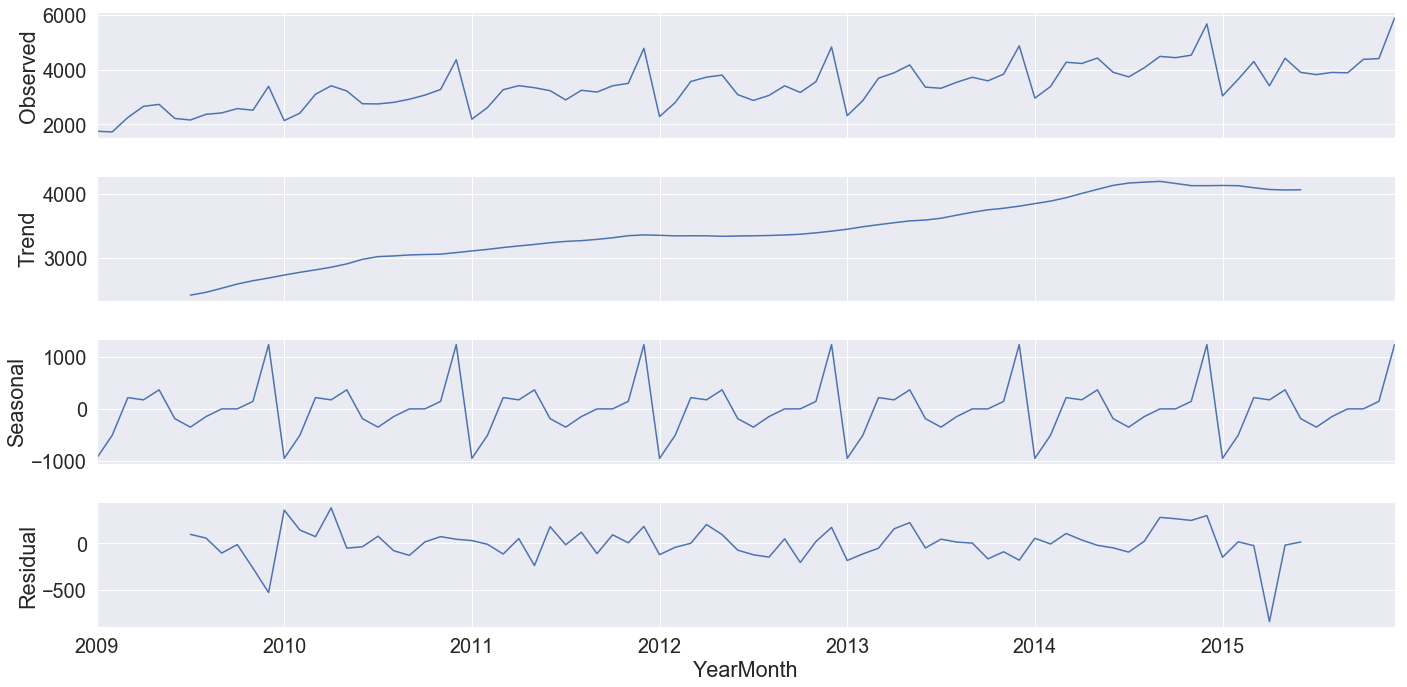

In [179]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(women_clothing_sales.WomenClothing_Sales, freq=12)
fig = res.plot()

#### Observations

- We can clearly obsereve that the time series has both trend and seasonality. 

## Model Building

### Holt-Winter's
- Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.
- Hence we need a method that takes into account both trend and seasonality to forecast future prices.
- One such algorithm that we can use in such a scenario is "Holt’s Winter" method. 
- The idea behind Holt’s Winter is to apply exponential smoothing to the seasonal components in addition to level and trend.

- Take 2009 - 2014 records as training and 2015 as validation Data.


In [230]:
def holt_winter(train, valid, var):
    train, test = train.iloc[:, -1], valid.iloc[:, -1]
    model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
    pred = model.predict(start=valid.index[0], end=valid.index[-1])
    return pred

### Predict On Validation Data

In [231]:
forecast_men2 = holt_winter(men_clothing_train, men_clothing_valid, 'MenSales')
forecast_women2 = holt_winter(women_clothing_train, women_clothing_valid, 'WomenSales')
forecast_others2 = holt_winter(other_clothing_train, other_clothing_valid, 'OthersSales')

### MAPE

In [232]:
print("Women", mean_absolute_percentage_error(forecast_women2, women_clothing_valid['WomenClothing_Sales']))
print("Men", mean_absolute_percentage_error(forecast_men2, men_clothing_valid['MenClothing_Sales']))
print("Other", mean_absolute_percentage_error(forecast_others2, other_clothing_valid['OtherClothing_Sales']))

Women 72.3674751035754
Men 15.101009498705928
Other 43.125795665863606


### Plotting WomenSales Predictions

In [233]:
train, test = women_clothing_train.iloc[:, -1], women_clothing_valid.iloc[:, -1]
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

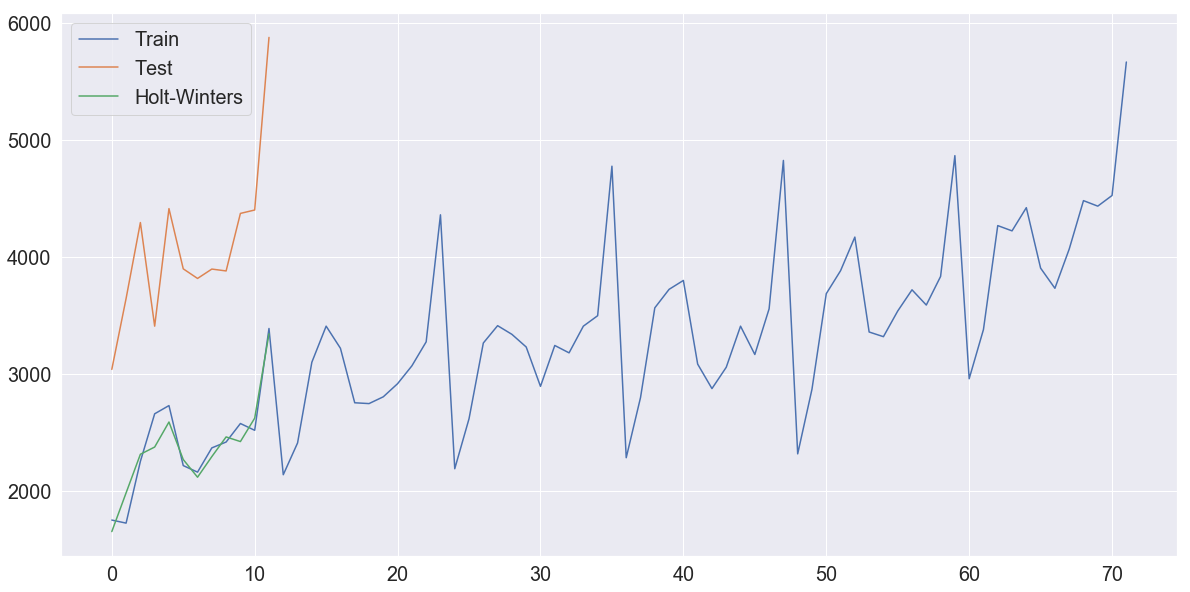

In [234]:
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')

### Auto-ARIMA

- Another Algorithm which can deal with both Trend and Seasonality in time series data is "ARIMA".
-  ARIMA is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting).

#### Use Data from 2009 to 2014 as Train Data and 2015 for Validaion.

In [180]:
def forecast_category_sales(train_set, var):
        
        model_series = auto_arima(train_set, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, 
                                  seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
        
        model_series.fit(train_set)

        forecast = model_series.predict(n_periods=12)
        forecast = pd.DataFrame(forecast, columns=['Sales(In ThousandDollars)_'+var], index=women_clothing_valid.index)
        return forecast

In [183]:
forecast_women = forecast_category_sales(women_clothing_train['WomenClothing_Sales'], 'WomenClothing')
forecast_men = forecast_category_sales(men_clothing_train['MenClothing_Sales'], 'MenClothing')
forecast_others = forecast_category_sales(other_clothing_train['OtherClothing_Sales'], 'OtherClothing')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=809.148, BIC=819.536, Fit time=0.747 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=820.907, BIC=825.062, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=811.862, BIC=820.172, Fit time=0.152 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=807.174, BIC=815.484, Fit time=0.445 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=807.037, BIC=817.425, Fit time=0.996 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=807.230, BIC=815.540, Fit time=0.452 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=805.448, BIC=811.681, Fit time=0.157 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=807.413, BIC=815.723, Fit time=0.262 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12);

### Predicting On Validation Dataset

In [186]:
print("Women", mean_absolute_percentage_error(forecast_women, women_clothing_valid['WomenClothing_Sales']))
print("Men", mean_absolute_percentage_error(forecast_men, men_clothing_valid['MenClothing_Sales']))
print("Other", mean_absolute_percentage_error(forecast_others, other_clothing_valid['OtherClothing_Sales']))

Women 20.966262776205916
Men 15.597396288204102
Other 10.922746436639766


### Now Use 2015 Data Also as Train Data As Time Series Models Uses Recent Sales Data For Predicting Future Sales i.e.  2016.

In [187]:
forecast_women1 = forecast_category_sales(women_clothing_sales['WomenClothing_Sales'], 'WomenClothing')
forecast_men1 = forecast_category_sales(men_clothing_sales['MenClothing_Sales'], 'MenClothing')
forecast_others1 = forecast_category_sales(other_clothing_sales['OtherClothing_Sales'], 'OtherClothing')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1001.150, BIC=1012.464, Fit time=1.353 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1013.130, BIC=1017.655, Fit time=0.039 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1003.642, BIC=1012.693, Fit time=0.487 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=999.489, BIC=1008.540, Fit time=1.043 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1000.447, BIC=1011.761, Fit time=1.398 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=998.252, BIC=1005.040, Fit time=0.296 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=999.931, BIC=1008.982, Fit time=0.449 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.063, BIC=1009.114, Fit time=0.473 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1000.928, BIC=1012.241, Fit time=0.660 seconds
Fit ARIMA: order=(0, 1, 1) seas

In [268]:
forecast_women1

,Sales(In ThousandDollars)_WomenClothing
0,3022.266143
1,3618.316093
2,4257.366043
3,3364.228493
4,4358.465944
5,3835.515894
6,3744.565844
7,3815.615794
8,3790.665744
9,4272.715694


### Predictions On Test Data

- Above we have generated the predictions for 2016 Sales Using Arima Model using historical sales from 2009 - 2015.
- "MAPE" Score For test data is "9.64". 

In [256]:
forecast_2016 = pd.DataFrame()
forecast_2016['WomenClothing'] = pd.DataFrame(forecast_women1, columns=['Sales(In ThousandDollars)_WomenClothing'])
forecast_2016['MenClothing'] = pd.DataFrame(forecast_men1, columns=['Sales(In ThousandDollars)_MenClothing'])
forecast_2016['OtherClothing'] = pd.DataFrame(forecast_others1, columns=['Sales(In ThousandDollars)_OtherClothing'])

In [257]:
forecast_2016

,WomenClothing,MenClothing,OtherClothing
0,3022.266143,536.258684,1244.977214
1,3618.316093,551.253171,1343.420477
2,4257.366043,624.775983,1404.243246
3,3364.228493,695.444134,1381.243046
4,4358.465944,723.835081,1401.401636
5,3835.515894,662.624344,1437.663853
6,3744.565844,604.888848,1350.116215
7,3815.615794,643.175081,1445.536766
8,3790.665744,635.056910,1273.220484
9,4272.715694,707.112232,1360.390599


#### Plot The Output Of ARIMA Model

In [261]:
forecast_2016['YearMonth'] = women_clothing_valid['YearMonth']
forecast_2016 = forecast_2016.set_index('YearMonth')
forecast_2016.head()

,WomenClothing,MenClothing,OtherClothing
YearMonth,,,
2015-01-01,3022.266143,536.258684,1244.977214
2015-02-01,3618.316093,551.253171,1343.420477
2015-03-01,4257.366043,624.775983,1404.243246
2015-04-01,3364.228493,695.444134,1381.243046
2015-05-01,4358.465944,723.835081,1401.401636


Text(0.5, 1.0, 'Time Series Predictions')

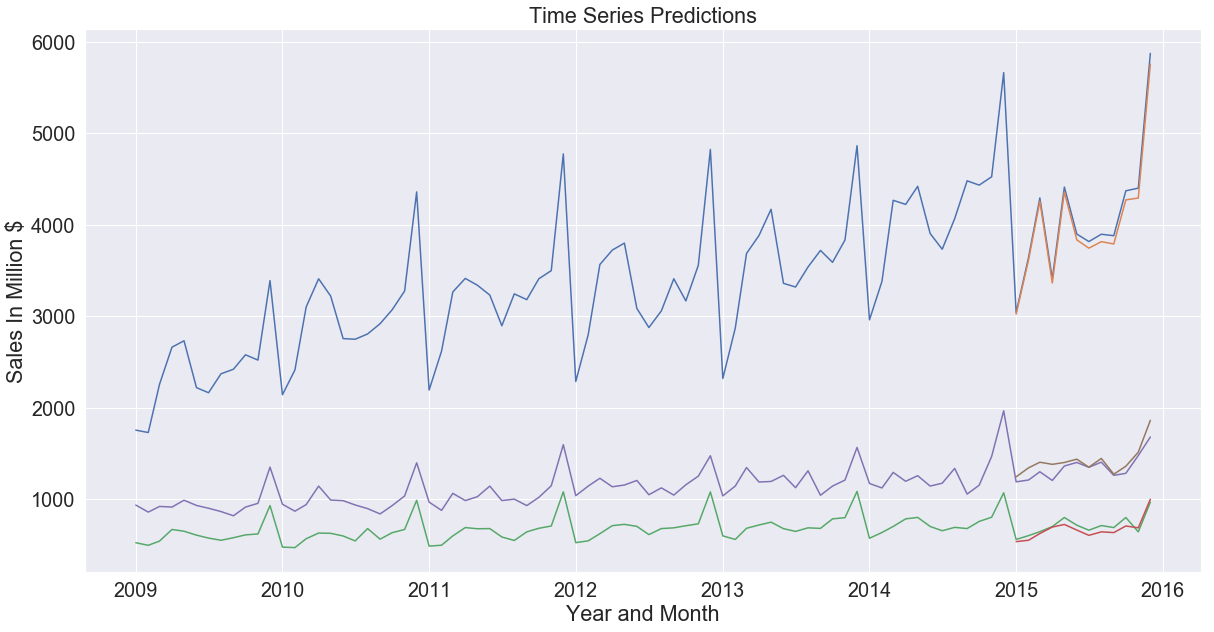

In [267]:
plt.plot(women_clothing_sales['WomenClothing_Sales'])
plt.plot(forecast_2016['WomenClothing'])

plt.plot(men_clothing_sales['MenClothing_Sales'])
plt.plot(forecast_2016['MenClothing'])

plt.plot(other_clothing_sales['OtherClothing_Sales'])
plt.plot(forecast_2016['OtherClothing'])
plt.ylabel('Sales In Million $')
plt.xlabel('Year and Month')
plt.title('Time Series Predictions')

#### Observations 

- Using Arima Model, we predicted the Sales for 2016 by using Sales history from 2009 to 2015
- In the above plot, we can observe that, We got good accurate predictions for all Categorical Clothing.

# Summary Of Project 

- In this project, I have used Sipervised Machine Learning Algorithms to predict/forecast Future Sales of WomenClothing, MenClothing and OtherClothing Products.

## Methos Followed 

#### Data Reshape
- Used Pivot Table to strucure the given raw data into proper shape.

#### Feature Extraction
- Extracted statistical features from weather data like minimun, maximum, mean and standard deviation for all the numeric features.

#### Feature Selection 
- Selected important features from Random Forest model to reduce the dimentions. 
- It will also be easier for model to predict the target with these features accurate and faster.

#### Light GBM
- Features derived from the above are given to the light gbm model and validated.
- My decision of choosing LGBM is, it is very fast at computations as it grows tree by leaf-wise.

#### Random Forest
- One of benefits of Random forest which excites most is, the power of handle large data set with higher dimensionality. It can handle thousands of input variables and identify most significant variables. Further, the model outputs Importance of variable, which can be a very handy feature.
- The other reason is, bagging models can perform very well on datasets which have less no. of records.

#### GBM
- Choosed Gradient Boosting algorithm to boost my prediction rate by reducing the error.
- It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.


#### ARIMA
- Here Sales are time based records. Time Series Models are very good at forecasting these type of datasets with minimal error rate. They are very simple and understandable.

#### MAPE
- Selected "Mean Absolute Percentage Error" as error metric. Because it is easy to undersatnd for retailers in terms of percentages rather than "RMSE" and "MAE" which have no units. 
- Also understanding Sales in Million Dollors can give better intuition.

# Conclusion

### Important Features

In this Project, I studied the Sales pattern of WomenClothing, MenClothing and OthersClothing using following important features:


- Monthly Real GDP Index   : Importance(7%).
- Monthly Nominal GDP Index  : Importance(5%).
- CPI                                   : Importance(4.77%)
- Earnings or wages in dollars per hour : Importance(4.4%)
- Cotton Monthly Price - US cents per Pound(lbs) : Importance(3.5%)
- Month                                          : Importance(3.3%)
- Unemployment rate	                             : Importance(3.27%)
- Year                                           : Importance(2.94%)
- CommercialBankInterestRateonCreditCardPlans    : Importance(2.93%)
- Event                                          : Importance(2.93%)
- Finance Rate on Personal Loans at Commercial...: Importance(2.62%)

and other few features which have atleast 0.1% Importance.

### Model Improvement

Based on the above model performance ,there is a scope in improving model performance by :


- Tuning The parameters as per the choosen model.


- Reducing the time of model run and also increasing the performance of model by training them with important features.



# Business Recommendation:

- The Above Frame Work will help in predicting the clothing sales of Women, Men and Others.


- The visualizations shown in this project can give better understanding of the data and give best insights about customer purchase pattern.


- These insights may help retailer to get better investment ideas and profitable plans for the retailers.


- By analysing above mentioned features, retailers can have good approximation of sales as these variables are easy to understand.



#### Important Observations:
- All categories have highest sales in the month of December.


- Events are playing important role in higher sales in months otherthan December.


- There are few variables which have high negetive correlation with Sales like "Finance Rates On Personal Loans", "Credit Card Interest Rates" explaining the sales in a better way. As the interest rates increasing, sales are decreasing.